#DHV Project
#By Rakshit Modanwal,Ansh Bhardwaj

In [ ]:
from IPython.display import HTML

def print_big_text(text):
  styled_text = f'<div style="font-size: 11em; text-align: center; color: yellow;">{text}</div>'
  return HTML(styled_text)

print_big_text("Welcome")

#Indian Startup Ecosystem Analytics Project


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Understanding The Data


In [ ]:
df=pd.read_csv('/content/startup_funding.csv')
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [ ]:
df.shape

(3044, 10)

In [ ]:
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
Date dd/mm/yyyy,3044,1035,02/02/2015,11
Startup Name,3044,2459,Ola Cabs,8
Industry Vertical,2873,821,Consumer Internet,941
SubVertical,2108,1942,Online Lending Platform,11
City Location,2864,112,Bangalore,700
Investors Name,3020,2412,Undisclosed Investors,39
InvestmentnType,3040,55,Private Equity,1356
Amount in USD,2084,471,"10,00,000",165
Remarks,419,72,Series A,175


In [ ]:
df.isnull().sum()

,0
Sr No,0
Date dd/mm/yyyy,0
Startup Name,0
Industry Vertical,171
SubVertical,936
City Location,180
Investors Name,24
InvestmentnType,4
Amount in USD,960
Remarks,2625


In [ ]:
df.isnull().sum().sum()

4900

#Project Description:
In the evolving landscape of startups, understanding the dynamics of funding is crucial. This dataset provides comprehensive insights into the startup funding ecosystem in India, capturing various aspects of funding activities over the years. From the types of investments to the key players and preferred industries, this dataset offers a rich tapestry of information that can help stakeholders make informed decisions and identify emerging trends.

In [ ]:
(df.isnull().sum() / df.shape[0] *100).sort_values(ascending=False).round(2).astype(str) + ' %'

,0
Remarks,86.24 %
Amount in USD,31.54 %
SubVertical,30.75 %
City Location,5.91 %
Industry Vertical,5.62 %
Investors Name,0.79 %
InvestmentnType,0.13 %
Sr No,0.0 %
Date dd/mm/yyyy,0.0 %
Startup Name,0.0 %


# Data Cleaning

In [ ]:
df['Amount in USD'].unique()

array(['20,00,00,000', '80,48,394', '1,83,58,860', '30,00,000',
       '18,00,000', '90,00,000', '15,00,00,000', '60,00,000',
       '7,00,00,000', '5,00,00,000', '2,00,00,000', '1,20,00,000',
       '3,00,00,000', '59,00,000', '20,00,000', '23,10,00,000',
       '4,86,000', '15,00,000', 'undisclosed', '2,60,00,000',
       '1,74,11,265', '13,00,000', '13,50,00,000', '3,00,000',
       '22,00,00,000', '1,58,00,000', '28,30,00,000', '1,00,00,00,000',
       '4,50,00,000', '58,50,00,000', 'unknown', '45,00,000', '33,00,000',
       '50,00,000', '1,80,00,000', '10,00,000', '1,00,00,000',
       '45,00,00,000', '16,00,000', '14,00,00,000', '3,80,80,000',
       '12,50,00,000', '1,10,00,000', '5,10,00,000', '3,70,00,000',
       '5,00,000', '11,00,00,000', '1,50,00,000', '65,90,000',
       'Undisclosed', '3,90,00,00,000', '1,90,00,000', '25,00,000',
       '1,45,000', '6,00,00,000', '1,60,00,000', '57,50,000', '3,19,605',
       '48,89,975.54', '7,50,00,000', '27,39,034.68', '1,51,09,500.0

In [ ]:
df['Amount in USD'] = df['Amount in USD'].apply(lambda x: str(x).replace(',', ''))

In [ ]:
replace_map = {
    "undisclosed": "0",
    "Undisclosed": "0",
    "unknown": "0",
    "14342000+": "0",
    "\\\\xc2\\\\xa010000000": "0",
    "\\\\xc2\\\\xa05000000": "0",
    "\\\\xc2\\\\xa019350000": "0",
    "\\\\xc2\\\\xa0600000": "0",
    "\\\\xc2\\\\xa020000000": "0",
    "\\\\xc2\\\\xa0N/A": "0",
    "\\\\xc2\\\\xa016200000": "0",
    "\\\\xc2\\\\xa0685000": "0",
    "nan": "0"
}

In [ ]:
df['Amount in USD'] = df['Amount in USD'].apply(lambda x: replace_map.get(str(x), x))

In [ ]:
df['Amount in USD'] = pd.to_numeric(df['Amount in USD'])

In [ ]:
df['Amount in USD'] = df['Amount in USD'].replace(0, np.nan)

In [ ]:
df['Amount in USD'].fillna(df['Amount in USD'].mean(), inplace=True)

<ipython-input-385-3face07054f9>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
df['Amount in USD'].isnull().sum()

0

In [ ]:
print(df['Date dd/mm/yyyy'].isnull().sum())


import datetime

def is_valid_date(date_str):
    try:
        datetime.datetime.strptime(date_str, '%d/%m/%Y')
        return True
    except ValueError:
        return False

# Apply the function to create a boolean Series
invalid_dates = ~df['Date dd/mm/yyyy'].apply(is_valid_date)

# Count the number of invalid dates
print(f"Number of invalid dates: {invalid_dates.sum()}")

# Display the rows with invalid dates
df[invalid_dates]

0
Number of invalid dates: 8


,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
192,193,05/072018,Loan Tap,Consumer Internet,Online Lending Platform For Salaried Professio...,Mumbai,"Shunwei Capital, Tuscan Ventures, Ashish Goenk...",Private Equity,6.250000e+06,NaN
2571,2572,01/07/015,HandyHome,Hyperlocal Electronics repair Service,NaN,Mumbai,"Bessemer Ventures, Kae Capital",Seed Funding,6.300000e+05,NaN
2606,2607,\\xc2\\xa010/7/2015,\\xc2\\xa0Infinity Assurance,\\xc2\\xa0Warranty Programs Service Administra...,NaN,\\xc2\\xa0New Delhi,\\xc2\\xa0Indian Angel Network,Seed Funding,1.842990e+07,NaN
2775,2776,12/05.2015,Mobiefit,Mobile Fitness App,NaN,Goa,Prototyze,Seed Funding,1.842990e+07,NaN
2776,2777,12/05.2015,Plancess,Online Education Platform,NaN,Mumbai,"Rajendra Gogri,\\xc2\\xa0 Chandrakant Gogri",Seed Funding,2.000000e+06,NaN
2831,2832,13/04.2015,The Porter,Logistics Tech,NaN,Mumbai,Kae Capital,Seed Funding,5.000000e+05,NaN
3011,3012,15/01.2015,Wishberry,NaN,NaN,NaN,"Rajan Anandan, Shankar Mahadevan, Deep Kalra &...",Seed Funding,6.500000e+05,NaN
3029,3030,22/01//2015,Corporate360,NaN,NaN,NaN,Group of Angel Investors,Seed Funding,2.000000e+05,NaN


In [ ]:
date_replace_map = {
    '12/05.2015': '12/05/2015',
    '13/04.2015': '13/04/2015',
    '15/01.2015': '15/01/2015',
    '22/01//2015': '22/01/2015',
    '05/072018': '05/07/2018',
    '01/07/015': '01/07/2015',
    '\\xc2\\xa010/7/2015': '10/07/2015',
    '\\\\xc2\\\\xa010/7/2015': '10/07/2015'
}
df['Date dd/mm/yyyy'] = df['Date dd/mm/yyyy'].apply(lambda x: date_replace_map.get(x, x))

In [ ]:
# Convert to datetime type by specifying the date format
df['Date dd/mm/yyyy'] = pd.to_datetime(df['Date dd/mm/yyyy'],format='%d/%m/%Y',errors='coerce')

In [ ]:
df.shape

(3044, 10)

In [ ]:
df['Date dd/mm/yyyy'].isnull().sum()

0

In [ ]:
df.drop('Remarks', axis=1, inplace=True)

In [ ]:
df['City  Location'].sample(5)

,City Location
782,Mumbai
1223,Mumbai
1224,Gurgaon
257,Chennai
328,Gurugram


In [ ]:
df['City  Location'][df['City  Location'] =='Bengaluru'] = 'Bangalore'

<ipython-input-394-2ebeb287e7d9>:1: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<ipython-input-394-2ebeb287e7d9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documen

In [ ]:
df['City  Location'].fillna(df['City  Location'].mode()[0], inplace=True)

<ipython-input-395-839454120d63>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
df['City  Location'].isnull().sum()

0

In [ ]:
df['City  Location'].unique()

array(['Bangalore', 'Gurgaon', 'New Delhi', 'Mumbai', 'Chennai', 'Pune',
       'Noida', 'Faridabad', 'San Francisco', 'San Jose,', 'Amritsar',
       'Delhi', 'Kormangala', 'Tulangan', 'Hyderabad', 'Burnsville',
       'Menlo Park', 'Gurugram', 'Palo Alto', 'Santa Monica', 'Singapore',
       'Taramani', 'Andheri', 'Chembur', 'Nairobi', 'Haryana', 'New York',
       'Karnataka', 'Mumbai/Bengaluru', 'Bhopal',
       'Bengaluru and Gurugram', 'India/Singapore', 'Jaipur', 'India/US',
       'Nagpur', 'Indore', 'New York, Bengaluru', 'California', 'India',
       'Ahemadabad', 'Rourkela', 'Srinagar', 'Bhubneswar', 'Chandigarh',
       'Delhi & Cambridge', 'Kolkatta', 'Kolkata', 'Coimbatore',
       'Udaipur', 'Ahemdabad', 'Bhubaneswar', 'Ahmedabad', 'Surat', 'Goa',
       'Uttar Pradesh', 'Nw Delhi', 'Gaya', 'Vadodara', 'Trivandrum',
       'Missourie', 'Panaji', 'Gwalior', 'Karur', 'Udupi', 'Kochi',
       'Agra', 'Bangalore/ Bangkok', 'Hubli', 'Kerala', 'Kozhikode', 'US',
       'Siligu

In [ ]:
replaces_city={
    '\\\\xc2\\\\xa0Noida':'Noida',
       '\\\\xc2\\\\xa0Bangalore':'Bangalore',
     '\\\\xc2\\\\xa0Gurgaon':'Gurgaon',
       '\\\\xc2\\\\xa0New Delhi':'New Delhi',
     '\\\\xc2\\\\xa0Mumbai':'Mumbai'
}
df['City  Location'] = df['City  Location'].apply(lambda x: replaces_city.get(x, x))

In [ ]:
df['City  Location'].unique()

array(['Bangalore', 'Gurgaon', 'New Delhi', 'Mumbai', 'Chennai', 'Pune',
       'Noida', 'Faridabad', 'San Francisco', 'San Jose,', 'Amritsar',
       'Delhi', 'Kormangala', 'Tulangan', 'Hyderabad', 'Burnsville',
       'Menlo Park', 'Gurugram', 'Palo Alto', 'Santa Monica', 'Singapore',
       'Taramani', 'Andheri', 'Chembur', 'Nairobi', 'Haryana', 'New York',
       'Karnataka', 'Mumbai/Bengaluru', 'Bhopal',
       'Bengaluru and Gurugram', 'India/Singapore', 'Jaipur', 'India/US',
       'Nagpur', 'Indore', 'New York, Bengaluru', 'California', 'India',
       'Ahemadabad', 'Rourkela', 'Srinagar', 'Bhubneswar', 'Chandigarh',
       'Delhi & Cambridge', 'Kolkatta', 'Kolkata', 'Coimbatore',
       'Udaipur', 'Ahemdabad', 'Bhubaneswar', 'Ahmedabad', 'Surat', 'Goa',
       'Uttar Pradesh', 'Nw Delhi', 'Gaya', 'Vadodara', 'Trivandrum',
       'Missourie', 'Panaji', 'Gwalior', 'Karur', 'Udupi', 'Kochi',
       'Agra', 'Bangalore/ Bangkok', 'Hubli', 'Kerala', 'Kozhikode', 'US',
       'Siligu

In [ ]:
df.shape

(3044, 9)

In [ ]:
df['Investors Name'].isnull().sum()

24

In [ ]:
investor_replace_map = {
    'Undisclosed investors': 'Undisclosed Investors',
    'Undisclosed Investor': 'Undisclosed Investors',
    'undisclosed investors': 'Undisclosed Investors',
    'Undisclosed': 'Undisclosed Investors'
}

df['Investors Name'] = df['Investors Name'].apply(lambda x: investor_replace_map.get(x, x))

In [ ]:
df['Investors Name'].fillna('Undisclosed Investors', inplace=True)

print(df['Investors Name'].isnull().sum())

0


<ipython-input-403-44c29d0b0010>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
df['Startup Name'][df['Startup Name'] == 'Ola Cabs'] = 'OlaCabs'

<ipython-input-404-2f7abe9f9fbc>:1: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<ipython-input-404-2f7abe9f9fbc>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documen

In [ ]:
df['Startup Name'].isnull().sum()

0

In [ ]:
df.isnull().sum()

,0
Sr No,0
Date dd/mm/yyyy,0
Startup Name,0
Industry Vertical,171
SubVertical,936
City Location,0
Investors Name,0
InvestmentnType,4
Amount in USD,0


In [ ]:
df['InvestmentnType'].unique()

array(['Private Equity Round', 'Series C', 'Series B', 'Pre-series A',
       'Seed Round', 'Series A', 'Series D', 'Seed', 'Series F',
       'Series E', 'Debt Funding', 'Series G', 'Series H', 'Venture',
       'Seed Funding', nan, 'Funding Round', 'Corporate Round',
       'Maiden Round', 'pre-series A', 'Seed Funding Round',
       'Single Venture', 'Venture Round', 'Pre-Series A', 'Angel',
       'Series J', 'Angel Round', 'pre-Series A',
       'Venture - Series Unknown', 'Bridge Round', 'Private Equity',
       'Debt and Preference capital', 'Inhouse Funding',
       'Seed/ Angel Funding', 'Debt', 'Pre Series A', 'Equity',
       'Debt-Funding', 'Mezzanine', 'Series B (Extension)',
       'Equity Based Funding', 'Private Funding', 'Seed / Angel Funding',
       'Seed/Angel Funding', 'Seed funding', 'Seed / Angle Funding',
       'Angel / Seed Funding', 'Private', 'Structured Debt', 'Term Loan',
       'PrivateEquity', 'Angel Funding', 'Seed\\\\nFunding',
       'Private\\\\nEqui

In [ ]:
investment_type_replace_map = {
    'Seed/ Angel Funding': 'Seed / Angel Funding',
    'Seed\\nFunding': 'Seed Funding',
    'Seed/Angel Funding': 'Seed / Angel Funding',
    'Angel / Seed Funding': 'Seed / Angel Funding',
    'Seed\\\\nFunding':'Seed Funding',
    'Private\\\\nEquity':'Private Equity'
}

df['InvestmentnType'] = df['InvestmentnType'].apply(lambda x: investment_type_replace_map.get(x, x))

In [ ]:
df[df['InvestmentnType'].isnull()]

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
30,31,2019-11-19,Furtados School of Music,Education,Music Education,Tulangan,IAN Fund and DSG Consumer Partners,NaN,2.000000e+08
76,77,2019-06-03,FabHotels,E-Commerce,Hospitality,Gurgaon,"Goldman Sachs, Accel Partners and Qualcomm",NaN,4.889976e+06
81,82,2019-06-06,Sistema.bio,Agriculture,Hybrid Reactor Biodigestor,Nairobi,"Shell Foundation, DILA CAPITAL, Engie RDE Fund...",NaN,2.739035e+06
1562,1563,2016-07-21,Drums Food,Food & Beverage,Yogurt and Ice Cream maker,Mumbai,"Verlinvest, DSG Consumer Partners",NaN,1.842990e+07


In [ ]:
df['InvestmentnType'].fillna(df['InvestmentnType'].mode()[0], inplace=True)

<ipython-input-410-7943e2a00463>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
df['InvestmentnType'].isnull().sum()

0

In [ ]:
df['Industry Vertical'].unique()

array(['E-Tech', 'Transportation', 'E-commerce', 'FinTech',
       'Fashion and Apparel', 'Logistics', 'Hospitality', 'Technology',
       'E-Commerce', 'Aerospace', 'B2B-focused foodtech startup',
       'Finance', 'Video', 'Gaming', 'Software', 'Health and wellness',
       'Education', 'Food and Beverage', 'Health and Wellness',
       'B2B Marketing', 'Video Games', 'SaaS', 'Last Mile Transportation',
       'Healthcare', 'Customer Service', 'B2B', 'Consumer Goods',
       'Advertising, Marketing', 'IoT', 'Information Technology',
       'Consumer Technology', 'Accounting', 'Retail',
       'Customer Service Platform', 'Automotive', 'EdTech', 'Services',
       'Compliance', 'Transport', 'Artificial Intelligence', 'Tech',
       'Health Care', 'Luxury Label', 'Waste Management Service',
       'Deep-Tech', 'Agriculture', 'Energy', 'Digital Media', 'Saas',
       'Automobile', 'Agtech', 'Social Media', 'Fintech', 'Edtech', 'AI',
       'Ecommerce', 'Nanotechnology', 'Services Platfo

In [ ]:
replacements = {
    'Online Home D\\\\xc3\\\\xa9cor': 'Online Home',
    'Hyperlocal\\\\xc2\\\\xa0 Grocery Delivery Service': 'Hyperlocal Grocery Delivery Service',
    'Mobile Growth Hacking\\\\nPlatform': 'Mobile Growth Hacking Platform',
    'WiFi \\xe2\\x80\\x93 first Cloud communication platform': 'WiFi first Cloud communication platform',
    'Women Ethnic Wear\\\\xc2\\\\xa0 Online Marketplace': 'Women Ethnic Wear Online Marketplace',
    'Location based Nightlife recommendation\\\\xc2\\\\xa0 Platform': 'Location based Nightlife recommendation Platform',
    'Luxury goods\\\\xc2\\\\xa0 Shopping Platform': 'Luxury goods Shopping Platform',
    'ECommerce Brands\\\\xe2\\\\x80\\\\x99 Full Service Agency': 'ECommerce Brands Full Service Agency',
    'Chain of Tea Caf\\\\xc3\\\\xa9\\\\xe2\\\\x80\\\\x99s': 'Chain of Tea',
    'App security\\\\xc2\\\\xa0 testing platform': 'App security testing platform',
    'Home Design & D\\\\xc3\\\\xa9cor solutions': 'Home Design & Decor solutions',
    '\\\\xc2\\\\xa0News Aggregator mobile app':'Aggregator mobile app',
       '\\\\xc2\\\\xa0Online Jewellery Store':'Online Jewellery Store',
       '\\\\xc2\\\\xa0Fashion Info Aggregator App':'Fashion Info Aggregator App',
       '\\\\xc2\\\\xa0Online Study Notes Marketplace':'Online Study Notes Marketplace',
       '\\\\xc2\\\\xa0Warranty Programs Service Administration':'Warranty Programs Service Administration',
       '\\\\xc2\\\\xa0Pre-School Chain':'Pre-School Chain',
       '\\\\xc2\\\\xa0Premium Loyalty Rewards Point Management':'Premium Loyalty Rewards Point Management',
       '\\\\xc2\\\\xa0Contact Center Software Platform':'Contact Center Software Platform',
       '\\\\xc2\\\\xa0Casual Dining restaurant Chain':'Casual Dining restaurant Chain',
       '\\\\xc2\\\\xa0Online Grocery Delivery':'Online Grocery Delivery',
    'Online home d\\\\xc3\\\\xa9cor marketplace': 'Online homemarketplace',
    'Healthcare\\\\nService provider': 'Healthcare Service provider',
    'Online Home D\\\\xc3\\\\xa9cor':'Online Home',
    'Online Furnishing\\\\neCommerce':'Online Furnishing eCommerce',
       'Interactive\\\\xc2\\\\xa0 How-To Guides':'Interactive How-To Guides',
    'OnDemand\\\\nMobile Handyman Services':'OnDemand Mobile Handyman Services'
}
for pattern, replacement in replacements.items():
    df['Industry Vertical'] = df['Industry Vertical'].str.replace(pattern, replacement, regex=True)

In [ ]:
replacements = {
    'Online Home D\\\\xc3\\\\xa9cor': 'Online Home',
    'Hyperlocal\\\\xc2\\\\xa0 Grocery Delivery Service': 'Hyperlocal Grocery Delivery Service',
    'Mobile Growth Hacking\\\\nPlatform': 'Mobile Growth Hacking Platform',
    'WiFi \\xe2\\x80\\x93 first Cloud communication platform': 'WiFi first Cloud communication platform',
    'Women Ethnic Wear\\\\xc2\\\\xa0 Online Marketplace': 'Women Ethnic Wear Online Marketplace',
    'Location based Nightlife recommendation\\\\xc2\\\\xa0 Platform': 'Location based Nightlife recommendation Platform',
    'Luxury goods\\\\xc2\\\\xa0 Shopping Platform': 'Luxury goods Shopping Platform',
    'ECommerce Brands\\\\xe2\\\\x80\\\\x99 Full Service Agency': 'ECommerce Brands Full Service Agency',
    'Chain of Tea Caf\\\\xc3\\\\xa9\\\\xe2\\\\x80\\\\x99s': 'Chain of Tea',
    'App security\\\\xc2\\\\xa0 testing platform': 'App security testing platform',
    'Home Design & D\\\\xc3\\\\xa9cor solutions': 'Home Design & Decor solutions',
    '\\\\xc2\\\\xa0News Aggregator mobile app':'Aggregator mobile app',
       '\\\\xc2\\\\xa0Online Jewellery Store':'Online Jewellery Store',
       '\\\\xc2\\\\xa0Fashion Info Aggregator App':'Fashion Info Aggregator App',
       '\\\\xc2\\\\xa0Online Study Notes Marketplace':'Online Study Notes Marketplace',
       '\\\\xc2\\\\xa0Warranty Programs Service Administration':'Warranty Programs Service Administration',
       '\\\\xc2\\\\xa0Pre-School Chain':'Pre-School Chain',
       '\\\\xc2\\\\xa0Premium Loyalty Rewards Point Management':'Premium Loyalty Rewards Point Management',
       '\\\\xc2\\\\xa0Contact Center Software Platform':'Contact Center Software Platform',
       '\\\\xc2\\\\xa0Casual Dining restaurant Chain':'Casual Dining restaurant Chain',
       '\\\\xc2\\\\xa0Online Grocery Delivery':'Online Grocery Delivery',
    'Online home d\\\\xc3\\\\xa9cor marketplace': 'Online homemarketplace',
    'Healthcare\\\\nService provider': 'Healthcare Service provider',
    'Online Home D\\\\xc3\\\\xa9cor':'Online Home',
    'Online Furnishing\\\\neCommerce':'Online Furnishing eCommerce',
       'Interactive\\\\xc2\\\\xa0 How-To Guides':'Interactive How-To Guides',
    'OnDemand\\\\nMobile Handyman Services':'OnDemand Mobile Handyman Services'
}

for pattern, replacement in replacements.items():
    # Use literal string matching instead of regex
    df['Industry Vertical'] = df['Industry Vertical'].str.replace(pattern, replacement, regex=False)

In [ ]:
df['Industry Vertical'].unique()

array(['E-Tech', 'Transportation', 'E-commerce', 'FinTech',
       'Fashion and Apparel', 'Logistics', 'Hospitality', 'Technology',
       'E-Commerce', 'Aerospace', 'B2B-focused foodtech startup',
       'Finance', 'Video', 'Gaming', 'Software', 'Health and wellness',
       'Education', 'Food and Beverage', 'Health and Wellness',
       'B2B Marketing', 'Video Games', 'SaaS', 'Last Mile Transportation',
       'Healthcare', 'Customer Service', 'B2B', 'Consumer Goods',
       'Advertising, Marketing', 'IoT', 'Information Technology',
       'Consumer Technology', 'Accounting', 'Retail',
       'Customer Service Platform', 'Automotive', 'EdTech', 'Services',
       'Compliance', 'Transport', 'Artificial Intelligence', 'Tech',
       'Health Care', 'Luxury Label', 'Waste Management Service',
       'Deep-Tech', 'Agriculture', 'Energy', 'Digital Media', 'Saas',
       'Automobile', 'Agtech', 'Social Media', 'Fintech', 'Edtech', 'AI',
       'Ecommerce', 'Nanotechnology', 'Services Platfo

In [ ]:
df['Industry Vertical'] = df['Industry Vertical'].fillna('unknown')

df['Industry Vertical'] = df['Industry Vertical'].str.lower()


def clean_industry(industry):
    parts = industry.split(' & ')
    cleaned_parts = []
    for part in parts:
        if part not in cleaned_parts:
            cleaned_parts.append(part)
        if len(cleaned_parts) == 2:
            break
    return ' & '.join(cleaned_parts)

df['Industry Vertical'] = df['Industry Vertical'].apply(clean_industry)

df['Industry Vertical'].isnull().sum()

0

IQR: 17429897.27080872
Number of outliers: 148
      Sr No Date dd/mm/yyyy  Startup Name Industry Vertical  \
0         1      2020-01-09        BYJU’S            e-tech   
6         7      2020-01-10        Zomato       hospitality   
8         9      2019-12-06      CarDekho        e-commerce   
9        10      2019-12-03  Dhruva Space         aerospace   
15       16      2019-12-11    Rein Games            gaming   
...     ...             ...           ...               ...   
2950   2951      2015-02-06    FreeCharge           unknown   
3010   3011      2015-01-14      RateGain           unknown   
3013   3014      2015-01-18     ShopClues           unknown   
3032   3033      2015-01-22        Antuit           unknown   
3037   3038      2015-01-27  CarDekho.com           unknown   

                          SubVertical City  Location  \
0                          E-learning      Bangalore   
6       Online Food Delivery Platform        Gurgaon   
8                          A

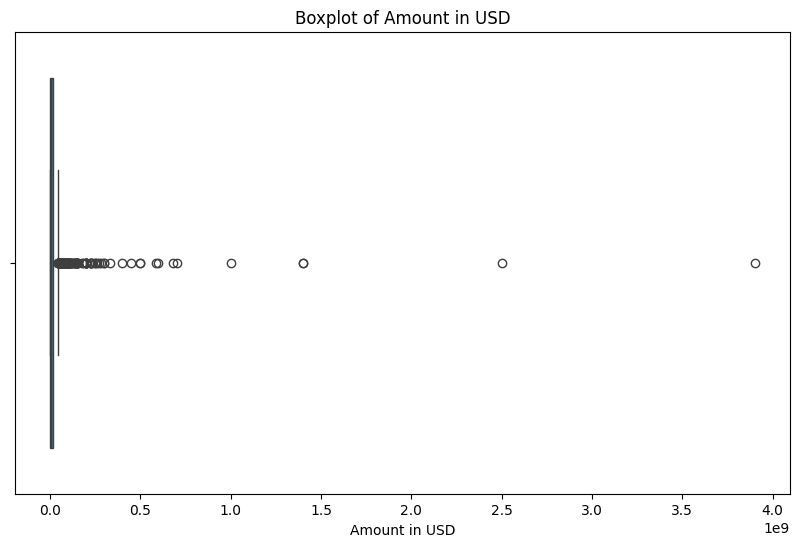

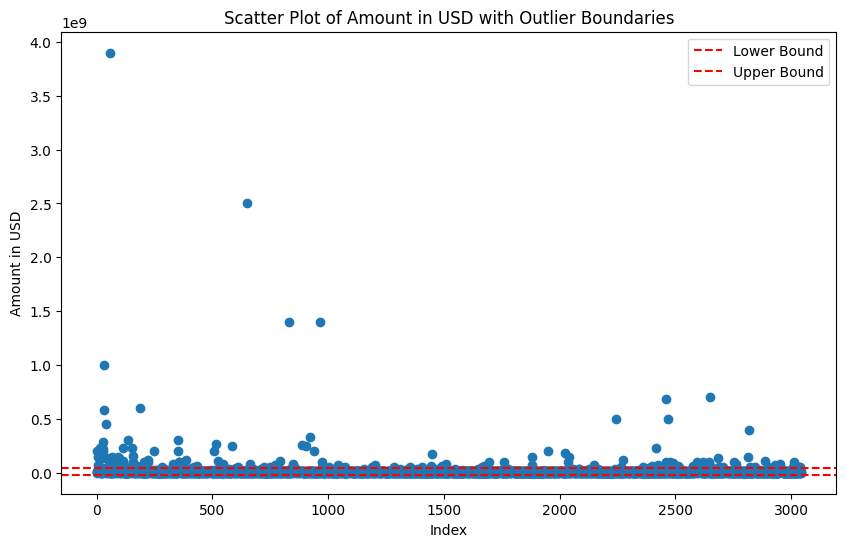

In [ ]:
# check outliers by iqr, print iqr , visualization using boxplot and scatter plot

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate IQR
Q1 = df['Amount in USD'].quantile(0.25)
Q3 = df['Amount in USD'].quantile(0.75)
IQR = Q3 - Q1
print(f"IQR: {IQR}")

# Identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Amount in USD'] < lower_bound) | (df['Amount in USD'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")
print(outliers)
# Visualization: Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Amount in USD'])
plt.title('Boxplot of Amount in USD')
plt.show()

# Visualization: Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Amount in USD'])
plt.axhline(y=lower_bound, color='r', linestyle='--', label='Lower Bound')
plt.axhline(y=upper_bound, color='r', linestyle='--', label='Upper Bound')
plt.title('Scatter Plot of Amount in USD with Outlier Boundaries')
plt.xlabel('Index')
plt.ylabel('Amount in USD')
plt.legend()
plt.show()

Number of outliers (Z-score > 3): 14
      Sr No Date dd/mm/yyyy      Startup Name  \
31       32      2019-11-25             Paytm   
33       34      2019-10-02             Udaan   
42       43      2019-09-04             GOQii   
60       61      2019-08-27  Rapido Bike Taxi   
188     189      2018-08-30        True North   
651     652      2017-08-11          Flipkart   
830     831      2017-05-18             Paytm   
924     925      2017-03-01               Ola   
966     967      2017-03-21          Flipkart   
2244   2245      2015-11-18               Ola   
2459   2460      2015-09-29             Paytm   
2470   2471      2015-08-01          Snapdeal   
2648   2649      2015-07-28      Flipkart.com   
2820   2821      2015-04-08           Olacabs   

                       Industry Vertical                         SubVertical  \
31                               fintech                       Mobile Wallet   
33                                   b2b                Business de

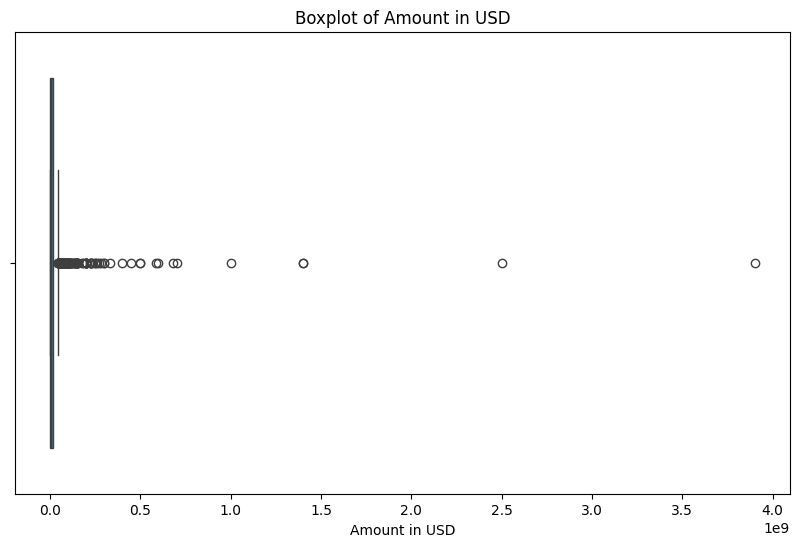

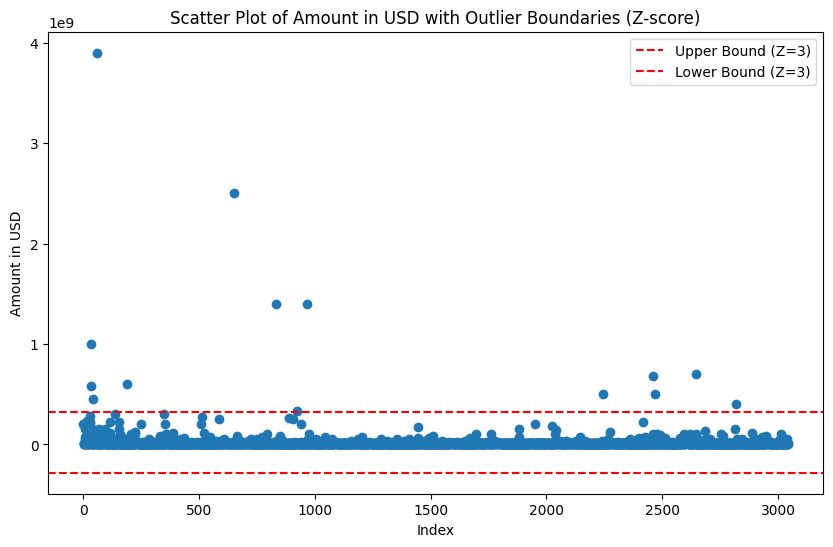

In [ ]:
# check outliers by z score, visualization using boxplot and scatter plot

import numpy as np

# Calculate Z-scores
df['Z-score'] = np.abs((df['Amount in USD'] - df['Amount in USD'].mean()) / df['Amount in USD'].std())

# Identify outliers (e.g., Z-score > 3)
outliers = df[df['Z-score'] > 3]
print(f"Number of outliers (Z-score > 3): {len(outliers)}")
print(outliers)

# Visualization: Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Amount in USD'])
plt.title('Boxplot of Amount in USD')
plt.show()

# Visualization: Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Amount in USD'])
plt.axhline(y=df['Amount in USD'].mean() + 3 * df['Amount in USD'].std(), color='r', linestyle='--', label='Upper Bound (Z=3)')
plt.axhline(y=df['Amount in USD'].mean() - 3 * df['Amount in USD'].std(), color='r', linestyle='--', label='Lower Bound (Z=3)')
plt.title('Scatter Plot of Amount in USD with Outlier Boundaries (Z-score)')
plt.xlabel('Index')
plt.ylabel('Amount in USD')
plt.legend()
plt.show()

#df.drop('Z-score', axis=1, inplace=True)

In [ ]:
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Z-score'],
      dtype='object')

Feature Engineering


In [ ]:
df['Year Month'] = (df['Date dd/mm/yyyy'].dt.year *
                         100) + df['Date dd/mm/yyyy'].dt.month


df[['Date dd/mm/yyyy', 'Year Month']].head()

,Date dd/mm/yyyy,Year Month
0,2020-01-09,202001
1,2020-01-13,202001
2,2020-01-09,202001
3,2020-01-02,202001
4,2020-01-02,202001


In [ ]:
df.isnull().sum()

,0
Sr No,0
Date dd/mm/yyyy,0
Startup Name,0
Industry Vertical,0
SubVertical,936
City Location,0
Investors Name,0
InvestmentnType,0
Amount in USD,0
Z-score,0


#Purpose:
To provide strategic guidance to new investors looking to invest in the Indian startup ecosystem by analyzing data and visualizing which sectors, cities, and types of investments have the highest potential.
#Project Importance:
Examining this project helps new investors make more informed and strategic decisions in the Indian startup ecosystem. Data-driven insights and visualizations enable investors to minimize risks and capitalize on high-potential opportunities.

In [ ]:
#1. What is the total funding amount raised by startups (in dollar billions) in the dataset?

total_funding = df['Amount in USD'].sum()
total_funding_billions = total_funding / 1000000000
print(f"Total funding amount raised by startups: {total_funding_billions:.2f} billion USD")

Total funding amount raised by startups: 56.10 billion USD


In [ ]:
# 2.What is the average funding amount raised per startup?
average_funding = df['Amount in USD'].mean()

print(f"The average funding amount raised per startup is: ${average_funding:,.2f}")

The average funding amount raised per startup is: $18,429,897.27


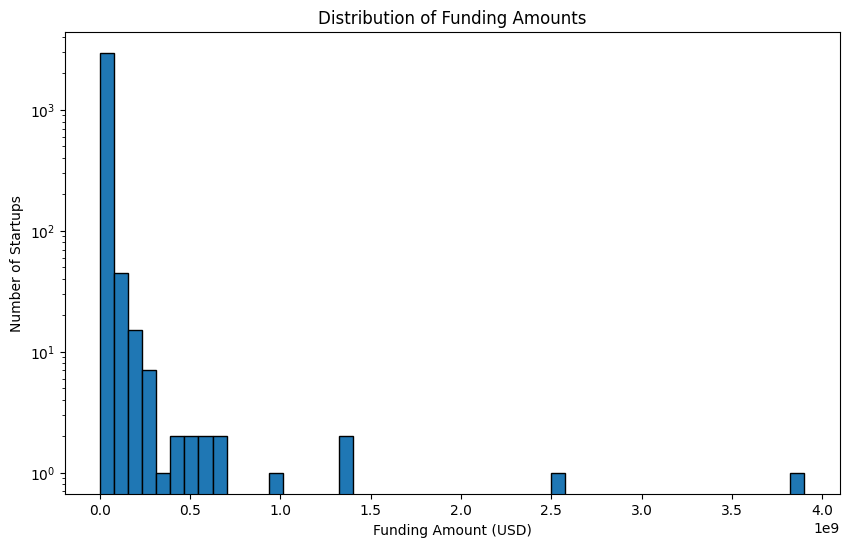

In [ ]:
# 3.What is the distribution of funding amounts? (e.g., histogram)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['Amount in USD'], bins=50, edgecolor='black')
plt.xlabel('Funding Amount (USD)')
plt.ylabel('Number of Startups')
plt.title('Distribution of Funding Amounts')
plt.yscale('log')
plt.show()

In [ ]:
#4. Identify the top 5 cities with the highest average funding amount per startup.
city_avg_funding = df.groupby('City  Location')['Amount in USD'].mean()
top_5_cities = city_avg_funding.sort_values(ascending=False).head(5)

top_5_cities

,Amount in USD
City Location,
Menlo Park,450000000.0
California,300000000.0
India/Singapore,226000000.0
Tulangan,200000000.0
Kormangala,142000000.0


In [ ]:
# 5.Identify the top 5 Indian cities with the highest average funding amount per startup.
indian_cities = df[df['City  Location'].isin(['Bangalore', 'Mumbai', 'New Delhi', 'Pune', 'Chennai', 'Hyderabad'])]
city_avg_funding_india = indian_cities.groupby('City  Location')['Amount in USD'].mean()
top_5_indian_cities = city_avg_funding_india.sort_values(ascending=False).head(5)
top_5_indian_cities

,Amount in USD
City Location,
Bangalore,2.480739e+07
New Delhi,1.507191e+07
Mumbai,1.408271e+07
Pune,1.199713e+07
Chennai,1.158995e+07


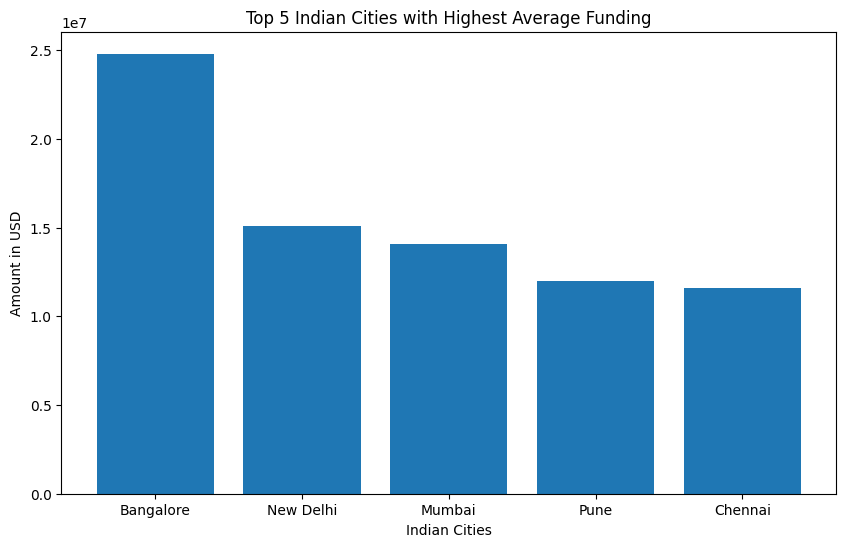

In [ ]:
# 6.Identify the top 5 Indian cities with the highest average funding amount per startup.
indian_cities = df[df['City  Location'].isin(['Bangalore', 'Mumbai', 'New Delhi', 'Pune', 'Chennai', 'Hyderabad'])]
city_avg_funding_india = indian_cities.groupby('City  Location')['Amount in USD'].mean()
top_5_indian_cities = city_avg_funding_india.sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_5_indian_cities.index, top_5_indian_cities.values)
plt.xlabel("Indian Cities")
plt.ylabel("Amount in USD")
plt.title("Top 5 Indian Cities with Highest Average Funding")
plt.show()

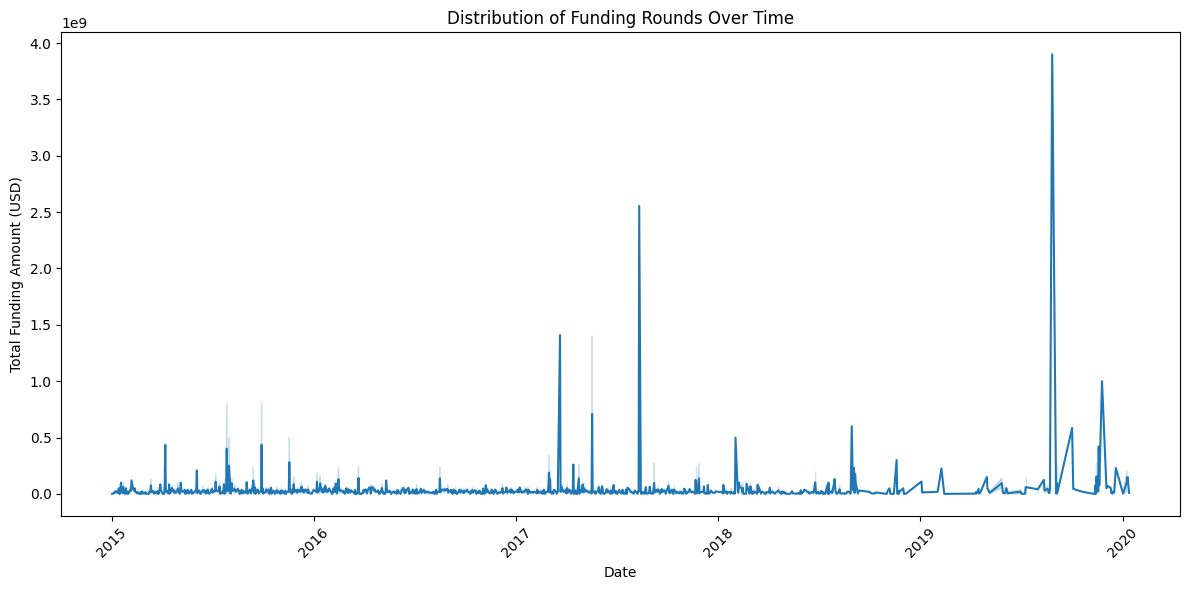

In [ ]:
# 7 Analyze the distribution of funding rounds over time.
funding_rounds_over_time = df.groupby(['Date dd/mm/yyyy', 'InvestmentnType'])['Amount in USD'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date dd/mm/yyyy', y='Amount in USD', data=funding_rounds_over_time) # hue='InvestmentnType'
plt.title('Distribution of Funding Rounds Over Time')
plt.xlabel('Date')
plt.ylabel('Total Funding Amount (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#8 Identify startups that have received funding from multiple investors.
df['Investors Name'] = df['Investors Name'].astype(str)

df['Investors Name'] = df['Investors Name'].str.split(',')
exploded_df = df.explode('Investors Name')

exploded_df['Investors Name'] = exploded_df['Investors Name'].str.strip()

investor_counts = exploded_df.groupby('Startup Name')['Investors Name'].count().reset_index()

multiple_investors_startups = investor_counts[investor_counts['Investors Name'] > 1]

x=multiple_investors_startups.sort_values(by='Investors Name', ascending=False).head(5)
x

,Startup Name,Investors Name
1268,Medinfi,21
1952,Swiggy,19
743,Fynd,17
1422,NoBroker,15
2137,UrbanClap,15


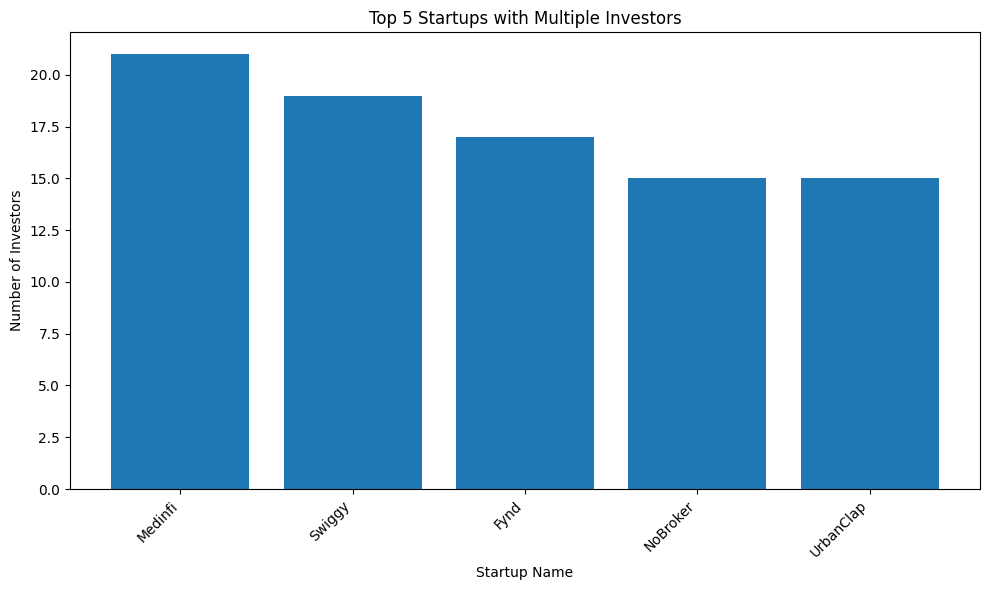

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'x' DataFrame from the previous code is available
#8 Identify startups that have received funding from multiple investors.
df['Investors Name'] = df['Investors Name'].astype(str)

df['Investors Name'] = df['Investors Name'].str.split(',')
exploded_df = df.explode('Investors Name')

exploded_df['Investors Name'] = exploded_df['Investors Name'].str.strip()

investor_counts = exploded_df.groupby('Startup Name')['Investors Name'].count().reset_index()

multiple_investors_startups = investor_counts[investor_counts['Investors Name'] > 1]

x=multiple_investors_startups.sort_values(by='Investors Name', ascending=False).head(5)

plt.figure(figsize=(10, 6))
# Accessing the correct column for number of investors, likely named 'Investors Name'
plt.bar(x['Startup Name'], x['Investors Name'])
plt.xlabel("Startup Name")
plt.ylabel("Number of Investors")
plt.title("Top 5 Startups with Multiple Investors")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

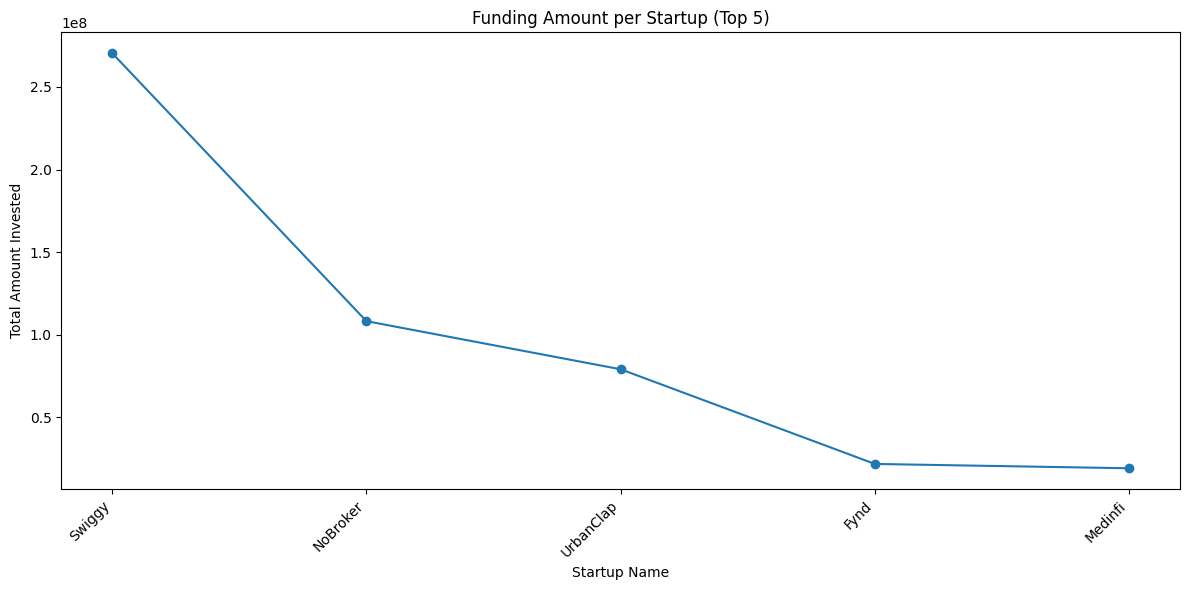

In [ ]:
# 9 Identify startups that have received funding from multiple investors.
import pandas as pd
import matplotlib.pyplot as plt

df['Investors Name'] = df['Investors Name'].astype(str)

df['Investors Name'] = df['Investors Name'].str.split(',')
exploded_df = df.explode('Investors Name')

exploded_df['Investors Name'] = exploded_df['Investors Name'].str.strip()

investor_counts = exploded_df.groupby('Startup Name')['Investors Name'].count().reset_index()

multiple_investors_startups = investor_counts[investor_counts['Investors Name'] > 1]

x = multiple_investors_startups.sort_values(by='Investors Name', ascending=False).head(5)

# Merge with original DataFrame to get 'Amount in USD'
x = pd.merge(x, df[['Startup Name', 'Amount in USD']], on='Startup Name', how='left')

# Group by 'Startup Name' and sum 'Amount in USD'
x = x.groupby('Startup Name')['Amount in USD'].sum().reset_index()

# Sort by 'Amount in USD' and select top 5
x = x.sort_values(by=['Amount in USD'], ascending=False).head(5) # Select top 5 based on 'Amount in USD'


plt.figure(figsize=(12, 6))
plt.plot(x['Startup Name'], x['Amount in USD'], marker='o', linestyle='-')

plt.xlabel('Startup Name')
plt.ylabel('Total Amount Invested')
plt.title('Funding Amount per Startup (Top 5)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

City  Location
Agra             1.842990e+07
Ahemadabad       3.172406e+06
Ahemdabad        1.842990e+07
Ahmedabad        8.325391e+06
Amritsar         3.000000e+05
                     ...     
Udaipur          9.464949e+06
Udupi            1.521495e+07
Uttar Pradesh    1.842990e+07
Vadodara         8.049359e+06
Varanasi         5.200000e+04
Name: Amount in USD, Length: 106, dtype: float64


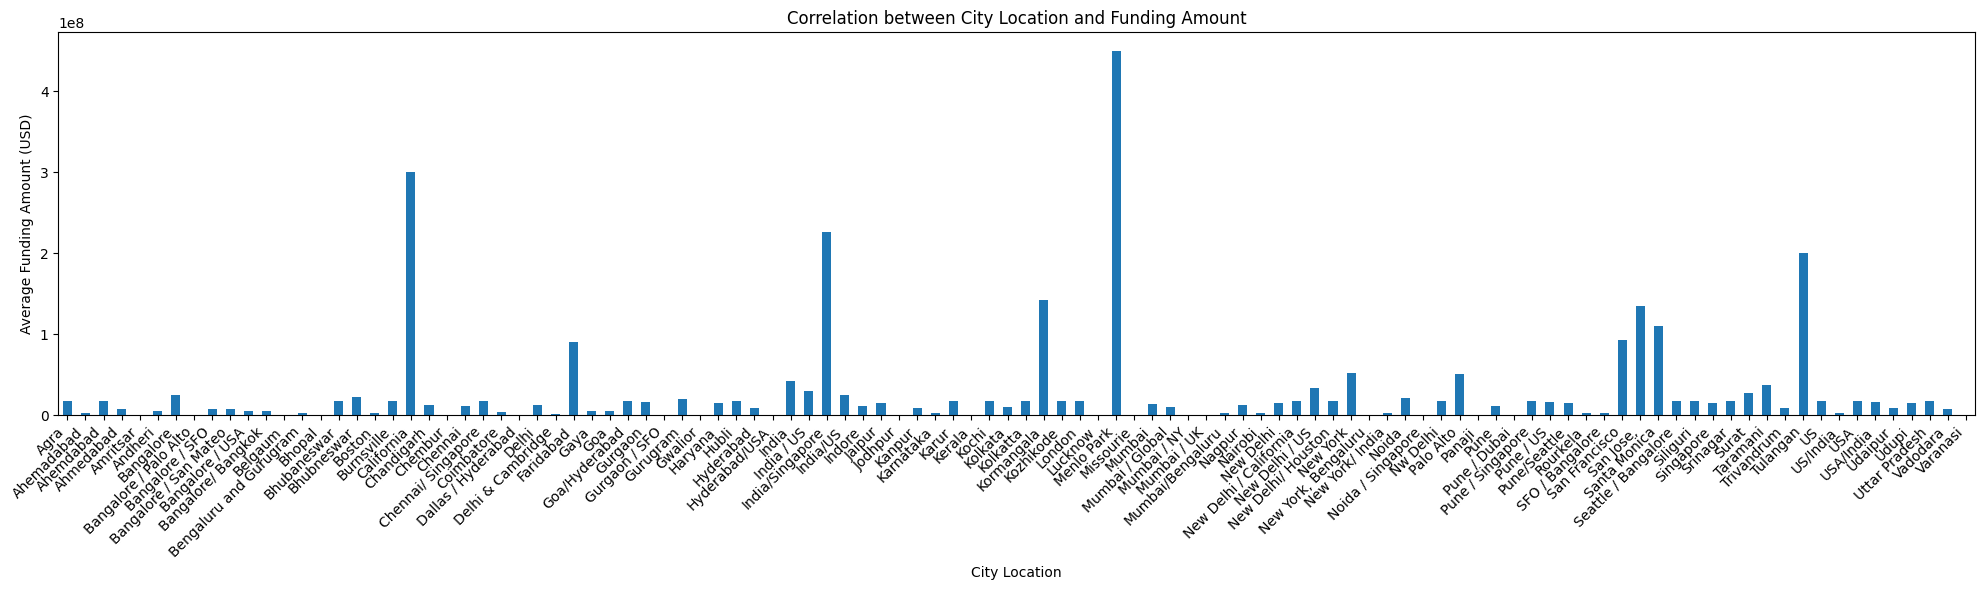

Correlation coefficient: -0.0322604420962223


In [ ]:
# 10 Is there a correlation between the startup's city location and the funding amount? (Group by city and analyze)

# Group data by city and calculate the average funding amount
city_funding = df.groupby('City  Location')['Amount in USD'].mean()

# Print the result
print(city_funding)

# Visualize the correlation (e.g., using a bar plot)
plt.figure(figsize=(20, 6))
city_funding.plot(kind='bar')
plt.xlabel('City Location')
plt.ylabel('Average Funding Amount (USD)')
plt.title('Correlation between City Location and Funding Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calculate the correlation coefficient
correlation = df['City  Location'].astype('category').cat.codes.corr(df['Amount in USD'])
print(f"Correlation coefficient: {correlation}")

In [ ]:
#11
city_funding.sort_values(ascending=False).head(20)

,Amount in USD
City Location,
Menlo Park,4.500000e+08
California,3.000000e+08
India/Singapore,2.260000e+08
Tulangan,2.000000e+08
Kormangala,1.420000e+08
"San Jose,",1.350000e+08
Santa Monica,1.100000e+08
San Francisco,9.350000e+07
Faridabad,9.014330e+07


Investment Type Analysis


InvestmentnType
Seed Funding                   1389
Private Equity                 1357
Seed / Angel Funding            138
Debt Funding                     25
Series A                         24
Series B                         20
Series C                         14
Series D                         12
Seed Round                        7
Pre-Series A                      4
Private Equity Round              4
Seed                              4
Seed / Angle Funding              3
Series F                          2
Equity                            2
pre-Series A                      2
Venture Round                     2
Corporate Round                   2
Series E                          2
Private                           1
Seed funding                      1
Private Funding                   1
Debt                              1
PrivateEquity                     1
Equity Based Funding              1
Series B (Extension)              1
Structured Debt                   1
Mezzanine   

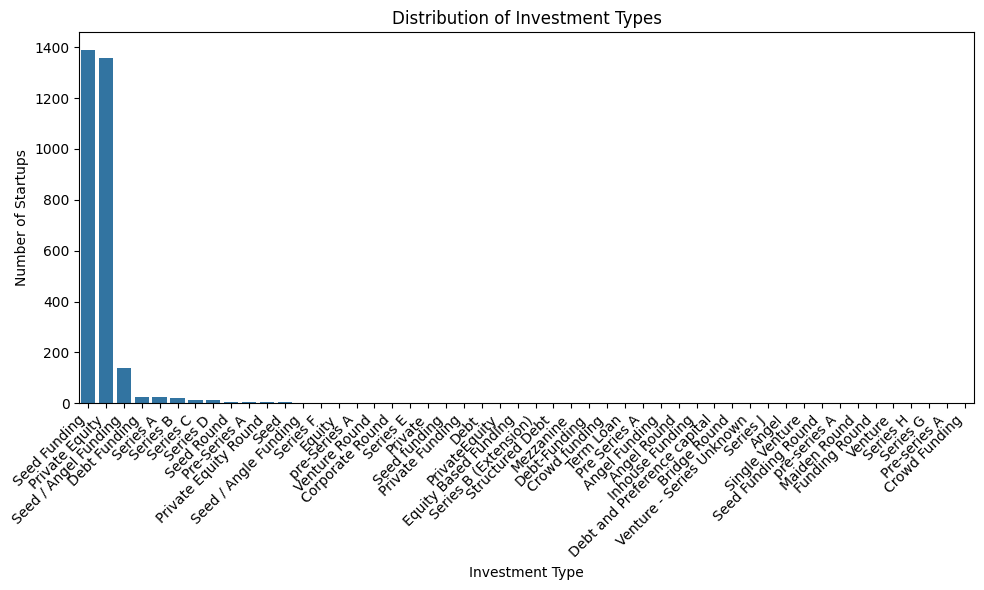

In [ ]:
#12 Which investment type is the most common among startups in the dataset? Visualize the distribution.

investment_type_counts = df['InvestmentnType'].value_counts()
print(investment_type_counts)

plt.figure(figsize=(10, 6))
sns.countplot(x='InvestmentnType', data=df, order=investment_type_counts.index)
plt.xlabel('Investment Type')
plt.ylabel('Number of Startups')
plt.title('Distribution of Investment Types')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

InvestmentnType
Funding Round                  1.000000e+09
Series B                       2.399598e+08
Series G                       2.310000e+08
Series H                       1.500000e+08
Single Venture                 1.400000e+08
Private Equity Round           1.265000e+08
Series D                       1.234832e+08
Series C                       7.462274e+07
Equity                         5.050000e+07
Series F                       4.500000e+07
Seed / Angle Funding           3.958037e+07
Equity Based Funding           3.100000e+07
Corporate Round                2.825495e+07
Seed Round                     2.797143e+07
Private Equity                 2.357258e+07
Pre Series A                   1.842990e+07
Seed funding                   1.842990e+07
Debt                           1.842990e+07
Venture                        1.842990e+07
Bridge Round                   1.842990e+07
Angel Funding                  1.842990e+07
Series E                       1.650000e+07
Private         

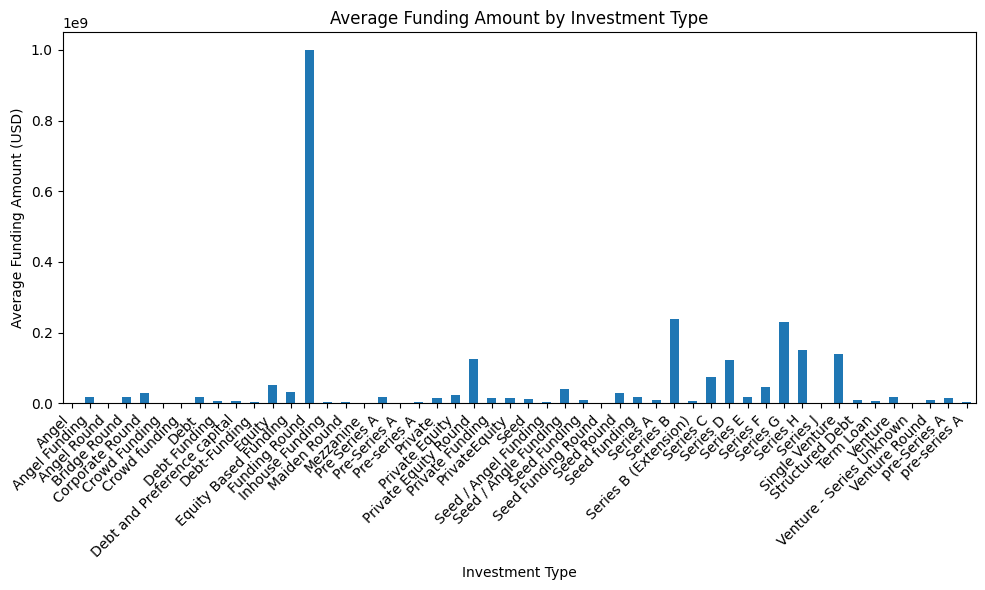

In [ ]:
# 13 Is there a relationship between the investment type and the funding amount? Calculate average funding amounts for each investment type.

# Calculate average funding amount for each investment type
average_funding_by_type = df.groupby('InvestmentnType')['Amount in USD'].mean()

print(average_funding_by_type.sort_values(ascending=False))

# Visualization
plt.figure(figsize=(10, 6))
average_funding_by_type.plot(kind='bar')
plt.xlabel('Investment Type')
plt.ylabel('Average Funding Amount (USD)')
plt.title('Average Funding Amount by Investment Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

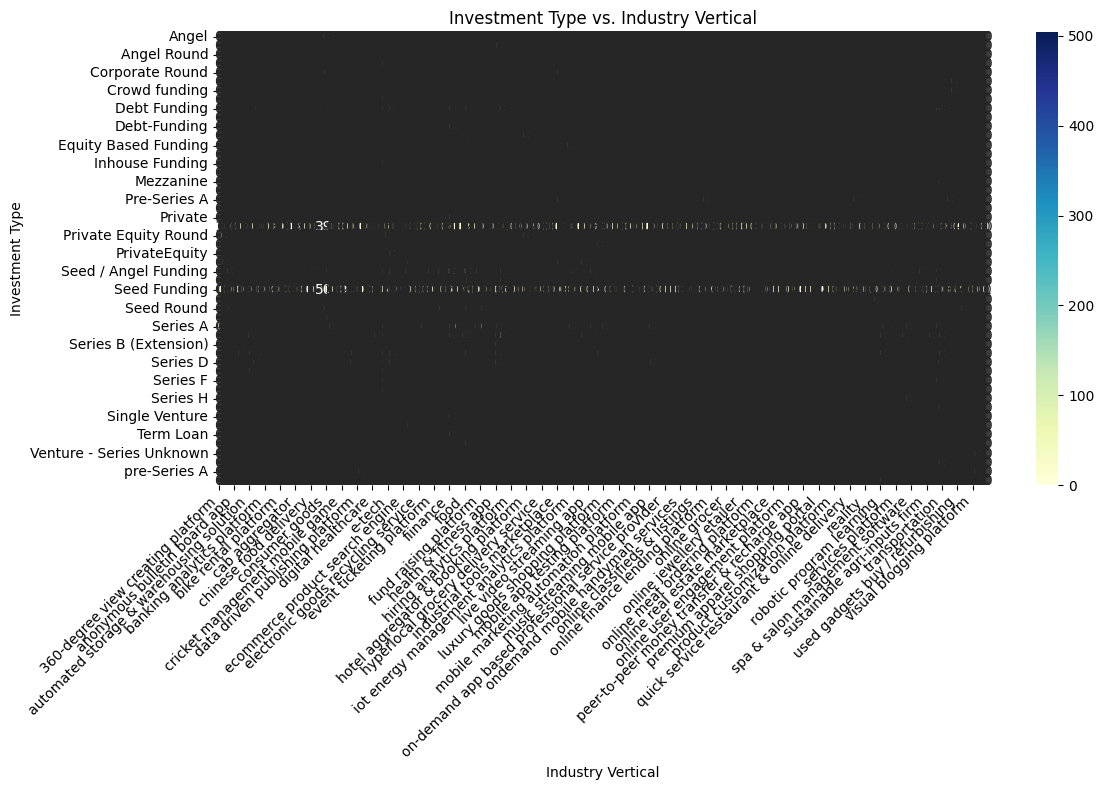

In [ ]:
#14 Do certain investment types tend to be associated with specific industry verticals? Create a cross-tabulation or visualization to explore this.

# Create a cross-tabulation of Investment Type and Industry Vertical
pd.crosstab(df['InvestmentnType'], df['Industry Vertical'])

# Visualize the relationship using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pd.crosstab(df['InvestmentnType'], df['Industry Vertical']), annot=True, fmt="d", cmap="YlGnBu")
plt.title('Investment Type vs. Industry Vertical')
plt.xlabel('Industry Vertical')
plt.ylabel('Investment Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Investor Analysis

In [ ]:
#15 Who are the most active investors in the dataset (in terms of the number of investments made)?

investor_counts = exploded_df.groupby('Investors Name')['Startup Name'].count().sort_values(ascending=False)
print(investor_counts.head(10))

Investors Name
["['Undisclosed Investors']"]    127
" '']"]                           58
["['Accel Partners'"              34
["['Sequoia Capital'"             28
["['Ratan Tata']"]                25
["['Indian Angel Network']"]      23
" ' Sequoia Capital'"             18
["['Blume Ventures'"              17
["['Kalaari Capital']"]           16
["['Kalaari Capital'"             16
Name: Startup Name, dtype: int64


In [ ]:
#16 Are there any investors who consistently invest in startups from a particular city or industry?

investor_city_counts = exploded_df.groupby(['Investors Name', 'City  Location'])['Startup Name'].count().reset_index()

max_investments_per_city = investor_city_counts.loc[investor_city_counts.groupby('Investors Name')['Startup Name'].idxmax()]

max_investments_per_city = max_investments_per_city.sort_values('Startup Name', ascending=False)

print(max_investments_per_city.head(10))

# Similarly, for industry
investor_industry_counts = exploded_df.groupby(['Investors Name', 'Industry Vertical'])['Startup Name'].count().reset_index()
max_investments_per_industry = investor_industry_counts.loc[investor_industry_counts.groupby('Investors Name')['Startup Name'].idxmax()]
max_investments_per_industry = max_investments_per_industry.sort_values('Startup Name', ascending=False)

print(max_investments_per_industry.head(10)) # Display the top 10

                        Investors Name City  Location  Startup Name
4593     ["['Undisclosed Investors']"]      Bangalore            38
2465              ["['Accel Partners'"      Bangalore            24
2324                           " '']"]      Bangalore            19
4279             ["['Sequoia Capital'"      Bangalore            13
3146  ["['Group of Angel Investors']"]      Bangalore            12
2760              ["['Blume Ventures'"      Bangalore            10
439             " ' Blume Ventures']"]      Bangalore             9
1808             " ' Sequoia Capital'"      Bangalore             9
3323      ["['Indian Angel Network']"]      New Delhi             8
4174             ["['SAIF Partners']"]      Bangalore             8
                        Investors Name  Industry Vertical  Startup Name
4881     ["['Undisclosed Investors']"]  consumer internet            49
2446                           " '']"]  consumer internet            27
3320  ["['Group of Angel Investors']

Industry Vertical Analysis



Industry Vertical
consumer internet     1.274141e+10
ecommerce             8.785542e+09
technology            5.325931e+09
transportation        3.916632e+09
finance               2.063587e+09
unknown               1.969007e+09
fintech               1.224211e+09
e-commerce            1.211692e+09
healthcare            8.973953e+08
online marketplace    7.001430e+08
Name: Amount in USD, dtype: float64


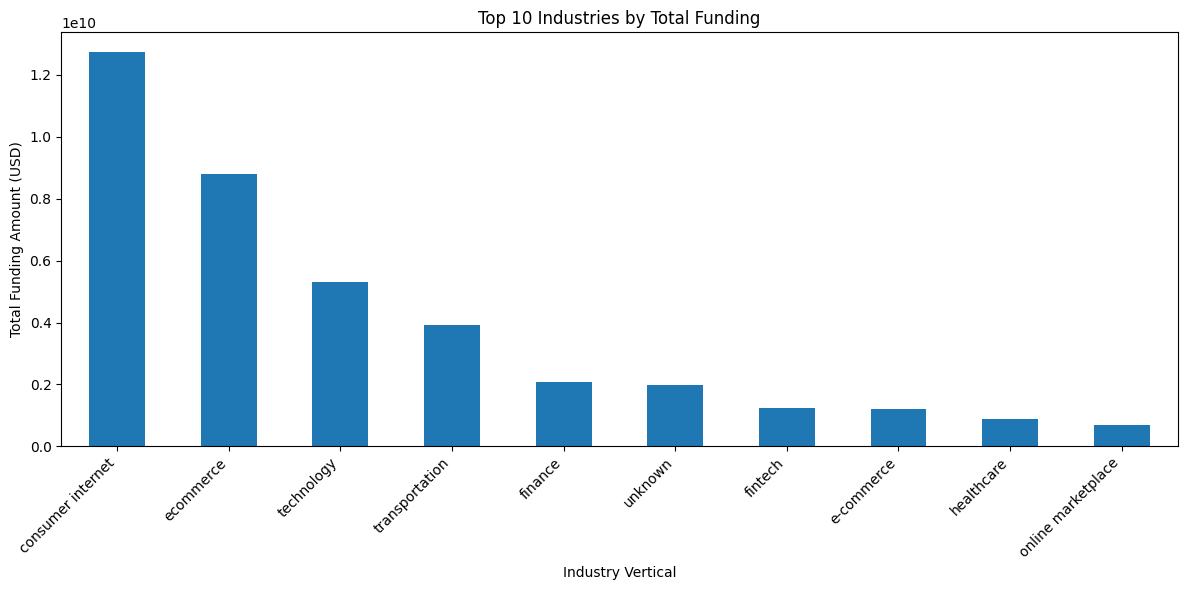

In [ ]:
#17 Which industry verticals have attracted the most funding overall?

industry_funding = df.groupby('Industry Vertical')['Amount in USD'].sum()
industry_funding = industry_funding.sort_values(ascending=False)

print(industry_funding.head(10))

#bar plot
plt.figure(figsize=(12, 6))
industry_funding.head(10).plot(kind='bar')
plt.xlabel('Industry Vertical')
plt.ylabel('Total Funding Amount (USD)')
plt.title('Top 10 Industries by Total Funding')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Time-Series Analysis

<ipython-input-440-62d5458e2a9b>:6: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



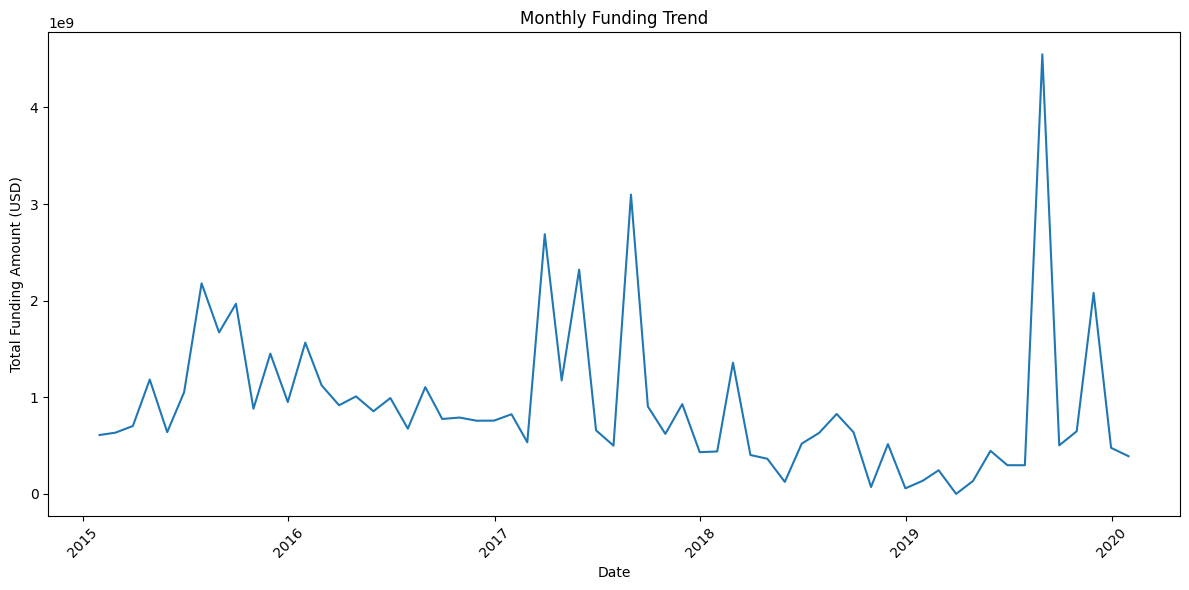

<ipython-input-440-62d5458e2a9b>:19: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.



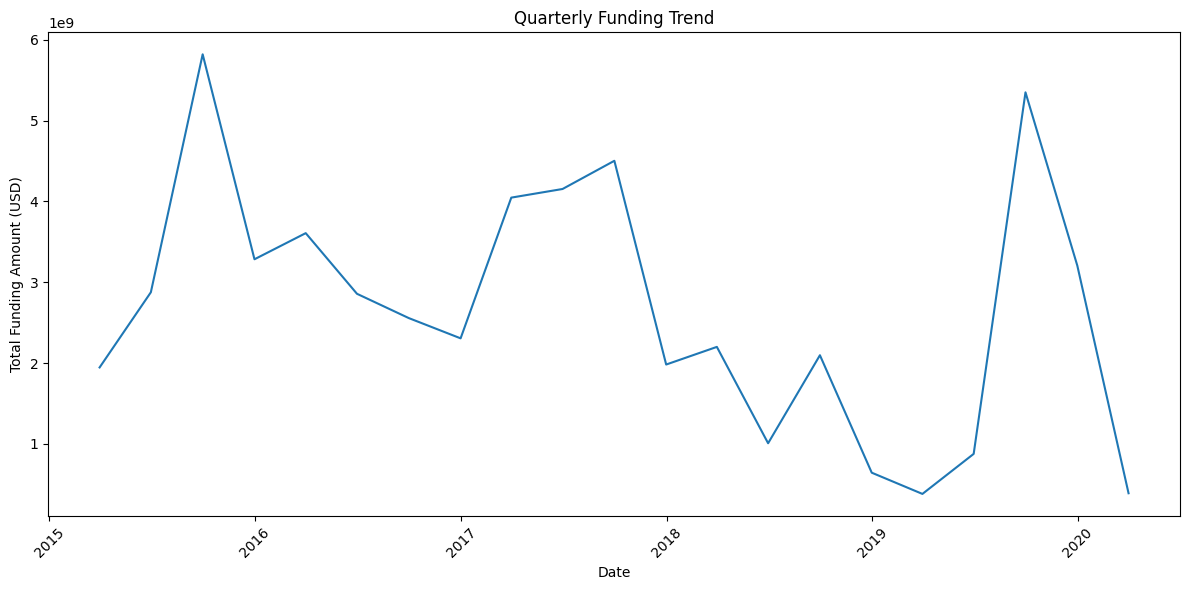

In [ ]:
#18 Analyze the trend of funding over time (monthly or quarterly).

import matplotlib.pyplot as plt
df['Date dd/mm/yyyy'] = pd.to_datetime(df['Date dd/mm/yyyy'], format='%d/%m/%Y', errors='coerce')

monthly_funding = df.groupby(pd.Grouper(key='Date dd/mm/yyyy', freq='M'))['Amount in USD'].sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_funding.index, monthly_funding.values)
plt.xlabel('Date')
plt.ylabel('Total Funding Amount (USD)')
plt.title('Monthly Funding Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Group by quarter and sum the funding amounts
quarterly_funding = df.groupby(pd.Grouper(key='Date dd/mm/yyyy', freq='Q'))['Amount in USD'].sum()

plt.figure(figsize=(12, 6))
plt.plot(quarterly_funding.index, quarterly_funding.values)
plt.xlabel('Date')
plt.ylabel('Total Funding Amount (USD)')
plt.title('Quarterly Funding Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

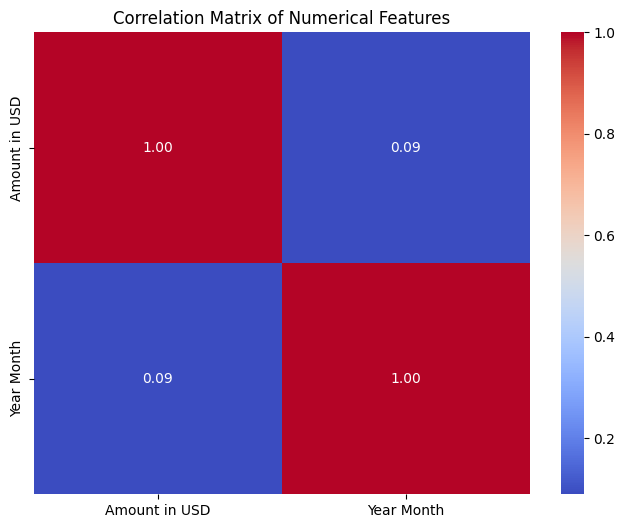

In [ ]:
#19 Explore correlations between different numerical variables in the dataset (e.g., funding amount, year of founding).

numerical_features = ['Amount in USD', 'Year Month']
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

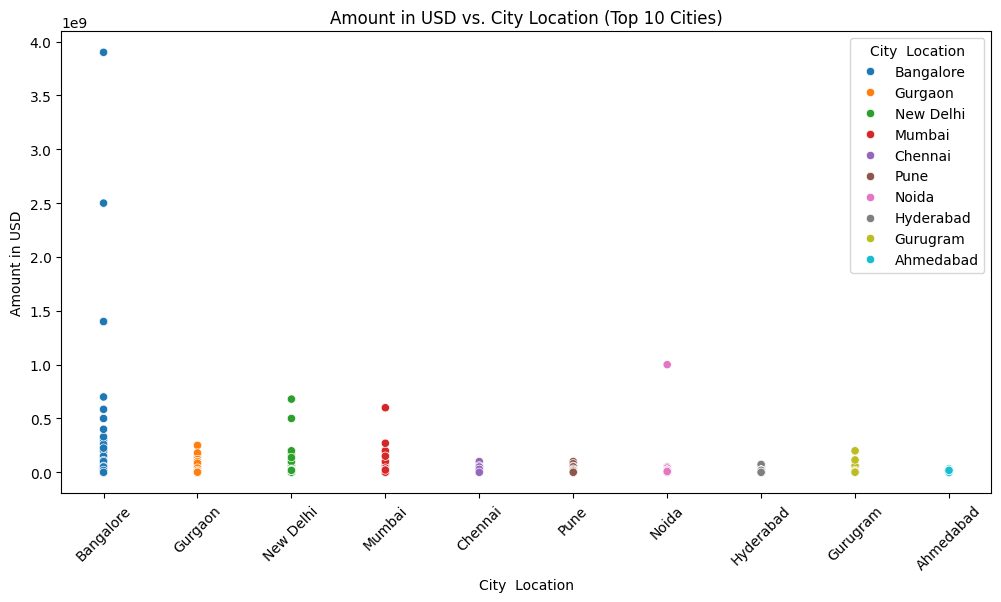

In [ ]:
#20 Use scatter plots or heatmaps to visualize these relationships.

top_10_cities = df['City  Location'].value_counts().head(10).index
df_top_cities = df[df['City  Location'].isin(top_10_cities)]
plt.figure(figsize=(12, 6))
sns.scatterplot(x='City  Location', y='Amount in USD', data=df_top_cities, hue='City  Location')
plt.xticks(rotation=45)
plt.title('Amount in USD vs. City Location (Top 10 Cities)')
plt.show()

#How Does the Funding Ecosystem changes with respect to Time?

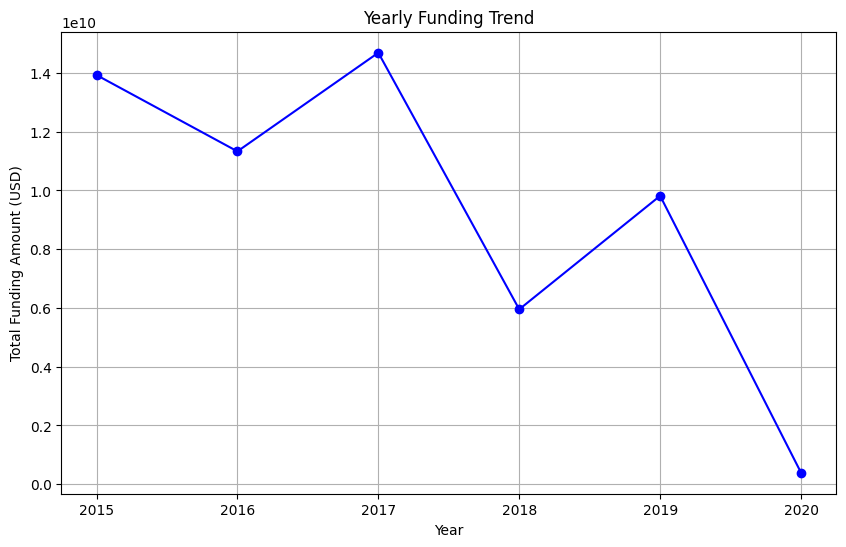

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date dd/mm/yyyy'], format='%d/%m/%Y')

# Add Year and Month columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Yearly funding trend
funding_trend_yearly = df.groupby('Year')['Amount in USD'].sum().reset_index()

# Monthly funding trend
funding_trend_monthly = df.groupby(['Year', 'Month'])['Amount in USD'].sum().reset_index()
funding_trend_monthly['Month'] = funding_trend_monthly['Month'].astype(str)

# Matplotlib ile Yıllık Fonlama Trendi Grafiği
plt.figure(figsize=(10, 6))
plt.plot(funding_trend_yearly['Year'], funding_trend_yearly['Amount in USD'], marker='o', linestyle='-', color='b')
plt.title('Yearly Funding Trend')
plt.xlabel('Year')
plt.ylabel('Total Funding Amount (USD)')
plt.grid(True)
plt.show()

# Plotly ile Aylık Fonlama Trendi Grafiği
fig = make_subplots(rows=1, cols=1, subplot_titles=("Monthly Funding Trend"))

# Monthly funding trend with selected years highlighted
colors = {2015: 'red', 2017: 'green', 2019: 'purple'}
for year in funding_trend_monthly['Year'].unique():
    monthly_data = funding_trend_monthly[funding_trend_monthly['Year'] == year]
    color = colors.get(year, 'gray')
    fig.add_trace(
        go.Scatter(x=monthly_data['Month'], y=monthly_data['Amount in USD'], mode='lines+markers',
                   name=str(year), line=dict(color=color)),
        row=1, col=1
    )

# Update layout
fig.update_layout(title_text="Monthly Funding Trend", height=600)
fig.update_xaxes(title_text="Month", row=1, col=1)
fig.update_yaxes(title_text="Total Funding Amount (USD)", row=1, col=1)

# Show the plot
fig.show()

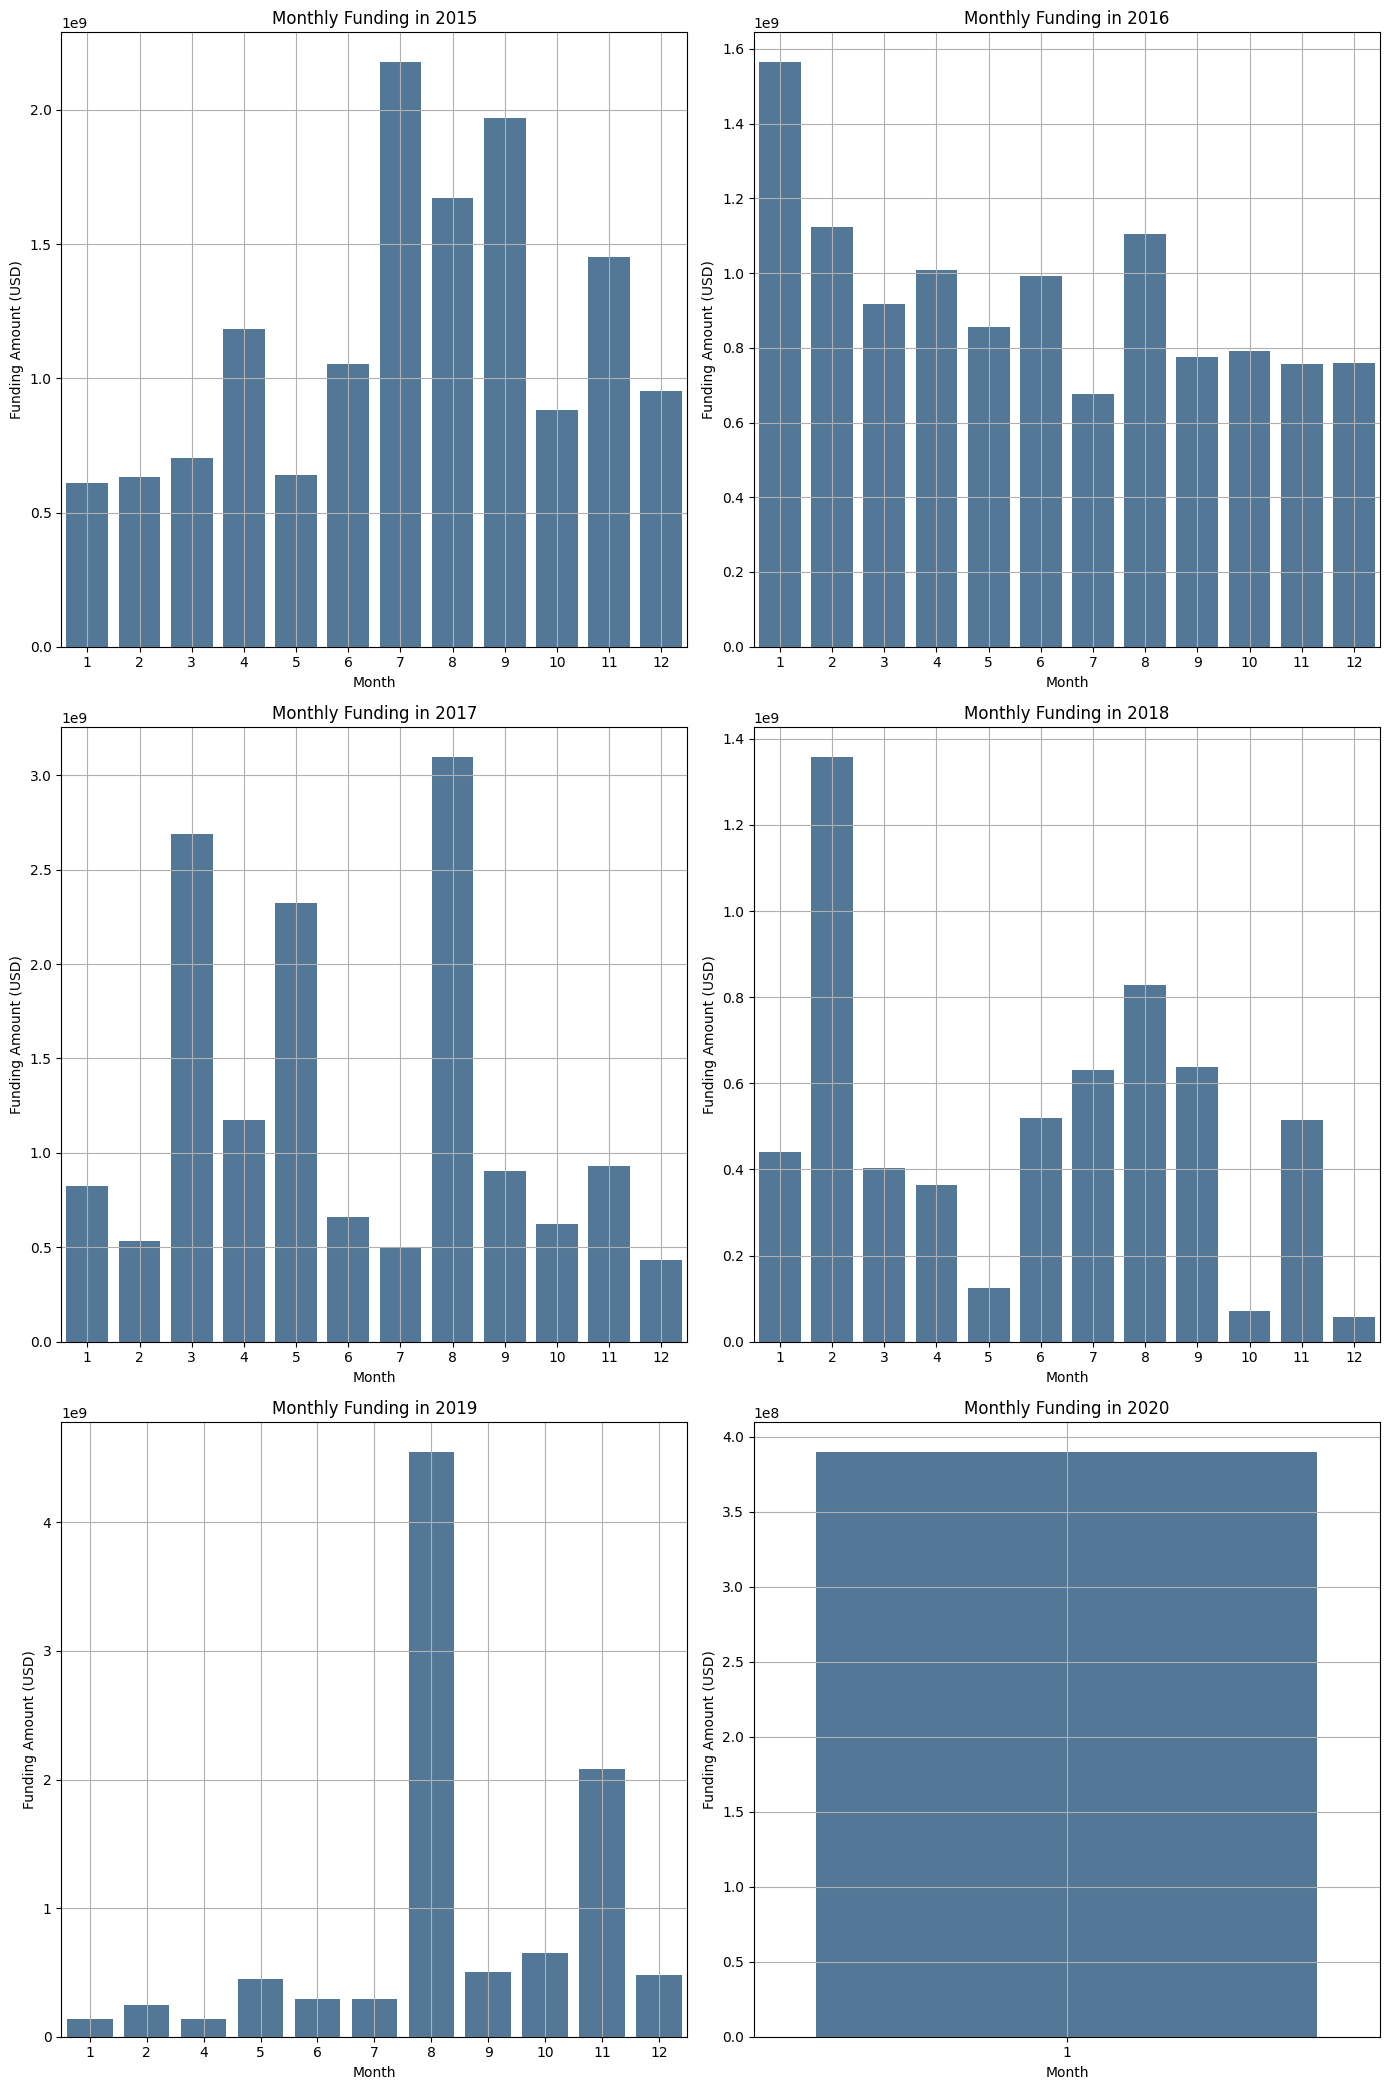

In [ ]:
# Extract year and month for monthly funding analysis
df['Year'] = df['Date dd/mm/yyyy'].dt.year
df['Month'] =df['Date dd/mm/yyyy'].dt.month

# Group by Year and Month to get monthly funding amounts
monthly_funding = df.groupby(['Year', 'Month'])['Amount in USD'].sum().reset_index()

# Unique years in the dataset
years = monthly_funding['Year'].unique()

# Plotting monthly funding amounts for each year using subplots
fig, axs = plt.subplots(len(years) // 2, 2, figsize=(14, 7 * (len(years) // 2)))
color = '#4878A2'
for i, year in enumerate(years):
    row = i // 2
    col = i % 2
    sns.barplot(x='Month',
                y='Amount in USD',
                data=monthly_funding[monthly_funding['Year'] == year],
                color=color,
                ax=axs[row, col])
    axs[row, col].set_title(f'Monthly Funding in {year}')
    axs[row, col].set_xlabel('Month')
    axs[row, col].set_ylabel('Funding Amount (USD)')
    axs[row, col].grid(True)

plt.tight_layout()
plt.show()

#What is the General Amount that Startups get in India?


In [ ]:
# Preview of the Top 10 Most Funded Initiatives
df['Amount in USD'].sort_values(ascending=False).head(10)

,Amount in USD
60,3.900000e+09
651,2.500000e+09
966,1.400000e+09
830,1.400000e+09
31,1.000000e+09
2648,7.000000e+08
2459,6.800000e+08
188,6.000000e+08
33,5.850000e+08
2244,5.000000e+08


In [ ]:
# Preview of the details of the 10 most funded Initiatives
df.sort_values(by='Amount in USD', ascending=False).head(5)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Z-score,Year Month,Date,Year,Month
60,61,2019-08-27,Rapido Bike Taxi,transportation,Bike Taxi,Bangalore,"[[""['Westbridge Capital']""]]",Series B,3.900000e+09,38.831117,201908,2019-08-27,2019,8
651,652,2017-08-11,Flipkart,ecommerce,Online Marketplace,Bangalore,"[[""['Softbank']""]]",Private Equity,2.500000e+09,24.825557,201708,2017-08-11,2017,8
966,967,2017-03-21,Flipkart,ecommerce,ECommerce Marketplace,Bangalore,"[[""['Microsoft'"", "" ' eBay'"", "" ' Tencent Ho...",Private Equity,1.400000e+09,13.821188,201703,2017-03-21,2017,3
830,831,2017-05-18,Paytm,ecommerce,Mobile Wallet & ECommerce platform,Bangalore,"[[""['SoftBank Group']""]]",Private Equity,1.400000e+09,13.821188,201705,2017-05-18,2017,5
31,32,2019-11-25,Paytm,fintech,Mobile Wallet,Noida,"[[""['Vijay Shekhar Sharma']""]]",Funding Round,1.000000e+09,9.819600,201911,2019-11-25,2019,11


In [ ]:
# Calculating the average funding received by a startup
df['Amount in USD'].mean()

18429897.27080872

In [ ]:
# Preview of the least funded initiatives
df['Amount in USD'].sort_values().head(10)

,Amount in USD
3020,16000.0
3021,16000.0
3019,16000.0
3018,16000.0
3017,16000.0
2933,16600.0
2934,16600.0
2935,16600.0
2936,16600.0
2937,16600.0


In [ ]:
# Preview of the details of the least funded initiatives
df.sort_values(by='Amount in USD').head(5)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Z-score,Year Month,Date,Year,Month
3020,3021,2015-01-19,Enabli,unknown,NaN,Bangalore,"[[""['Hyderabad Angels (at Startup Heroes event...",Seed Funding,16000.0,0.184212,201501,2015-01-19,2015,1
3021,3022,2015-01-19,CBS,unknown,NaN,Bangalore,"[[""['Hyderabad Angels (at Startup Heroes event...",Seed Funding,16000.0,0.184212,201501,2015-01-19,2015,1
3019,3020,2015-01-19,Yo Grad,unknown,NaN,Bangalore,"[[""['Hyderabad Angels (at Startup Heroes event...",Seed Funding,16000.0,0.184212,201501,2015-01-19,2015,1
3018,3019,2015-01-19,Play your sport,unknown,NaN,Bangalore,"[[""['Hyderabad Angels (at Startup Heroes event...",Seed Funding,16000.0,0.184212,201501,2015-01-19,2015,1
3017,3018,2015-01-19,Hostel Dunia,unknown,NaN,Bangalore,"[[""['Hyderabad Angels (at Startup Heroes event...",Seed Funding,16000.0,0.184212,201501,2015-01-19,2015,1


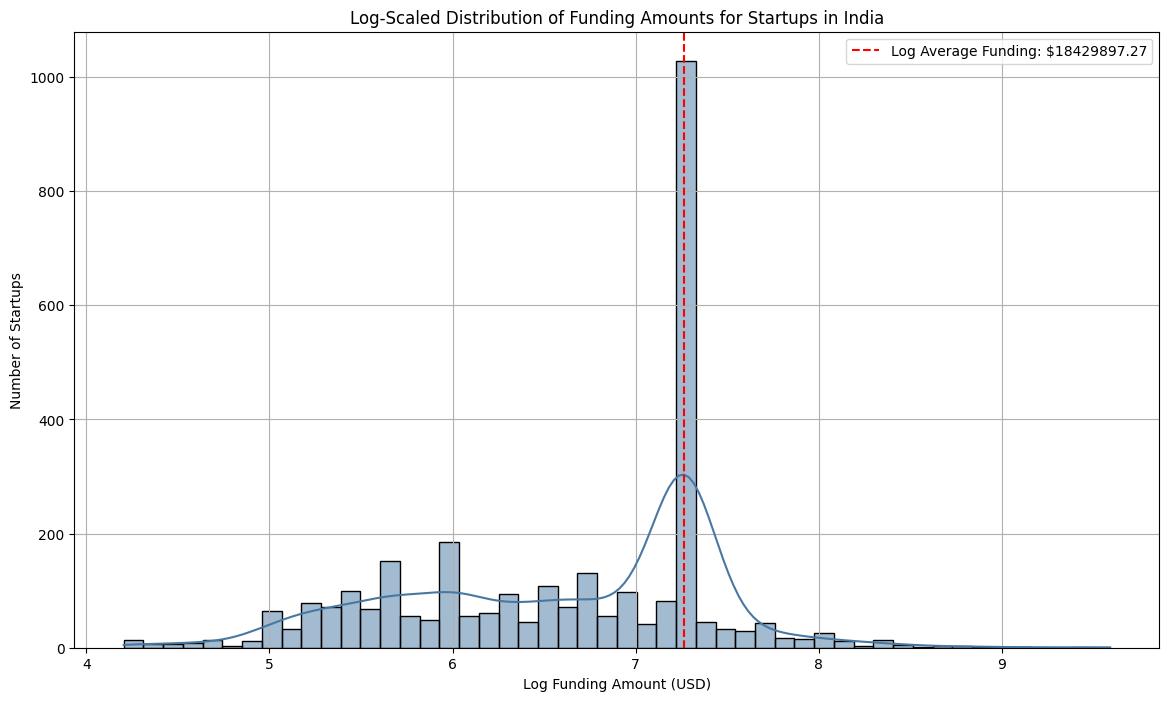

In [ ]:
# Calculate the average funding amount
average_funding = df['Amount in USD'].mean()

# Log-transform the funding amounts for better visualization
df['Log Amount in USD'] = np.log10(df['Amount in USD'] + 1)

# Plot the log-transformed funding amount distribution
plt.figure(figsize=(14, 8))
sns.histplot(df['Log Amount in USD'], bins=50, kde=True, color='#4878A2')
plt.axvline(np.log10(average_funding + 1), color='r', linestyle='--', label=f'Log Average Funding: ${average_funding:.2f}')
plt.title('Log-Scaled Distribution of Funding Amounts for Startups in India')
plt.xlabel('Log Funding Amount (USD)')
plt.ylabel('Number of Startups')
plt.legend()
plt.grid(True)
plt.show()

#Which Kind of Industries are more preferred for Startups?

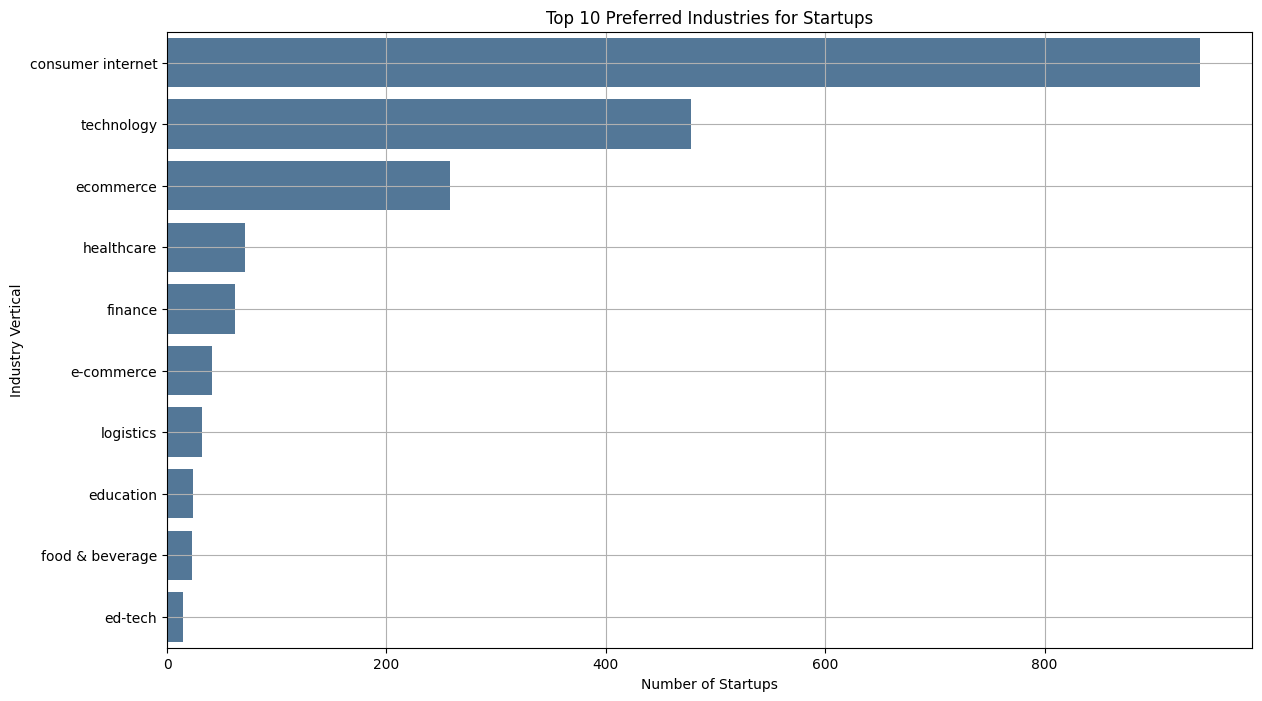

In [ ]:
# Identify the top 10 industries
top_industries = df[(df['Industry Vertical'] != 'unknown')]['Industry Vertical'].value_counts().head(10).reset_index()
top_industries.columns = ['Industry Vertical', 'Count']

# Create the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Count', y='Industry Vertical', data=top_industries, color='#4878A2')
plt.title('Top 10 Preferred Industries for Startups')
plt.xlabel('Number of Startups')
plt.ylabel('Industry Vertical')
plt.grid(True)
plt.show()

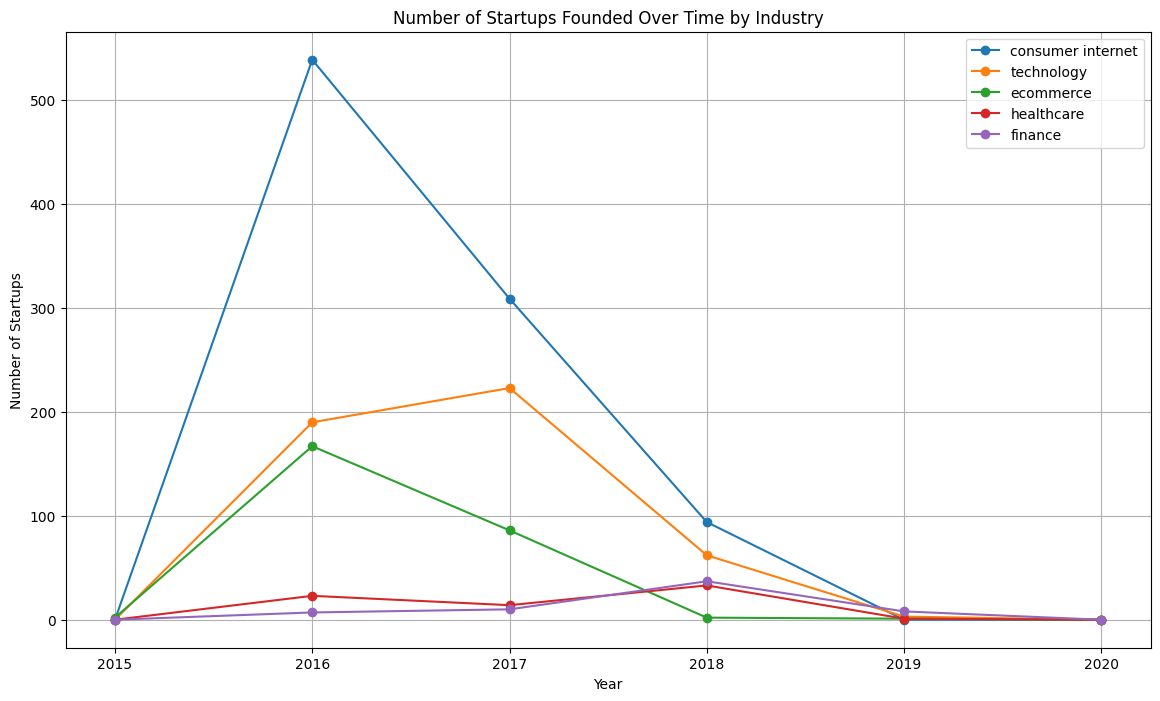

In [ ]:
# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date dd/mm/yyyy'], format='%d/%m/%Y')

# Extract year and group by year and industry
df['Year'] = df['Date'].dt.year
yearly_industry_count = df.groupby(['Year', 'Industry Vertical']).size().unstack().fillna(0)

# Plotting the line plots for top industries over time
top_industries_list = top_industries['Industry Vertical'].head(5)

plt.figure(figsize=(14, 8))
for industry in top_industries_list:
    plt.plot(yearly_industry_count.index, yearly_industry_count[industry], marker='o', label=industry)
plt.title('Number of Startups Founded Over Time by Industry')
plt.xlabel('Year')
plt.ylabel('Number of Startups')
plt.legend()
plt.grid(True)
plt.show()

#Does Location also play a role, In determining the Growth of a Startup?

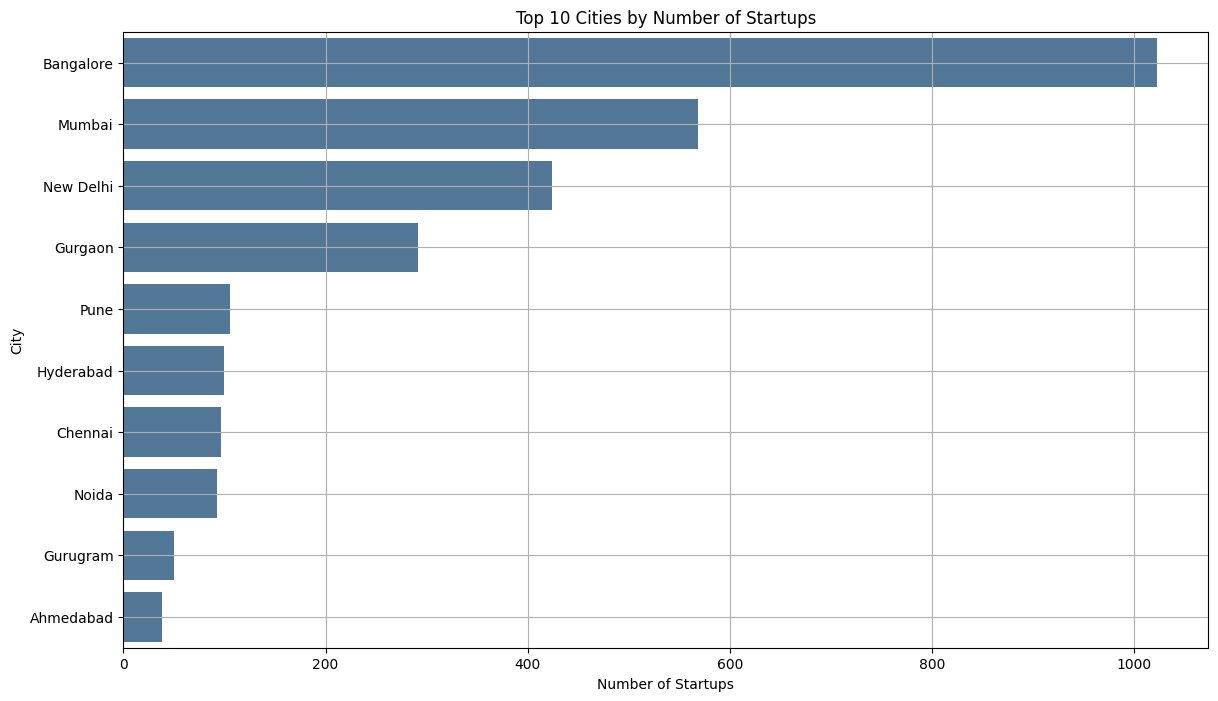

In [ ]:
# Count the number of startups in each city
top_cities_count = df['City  Location'].value_counts().head(10).reset_index()
top_cities_count.columns = ['City', 'Count']

# Plot the number of startups by city
plt.figure(figsize=(14, 8))
sns.barplot(x='Count', y='City', data=top_cities_count, color='#4878A2')
plt.title('Top 10 Cities by Number of Startups')
plt.xlabel('Number of Startups')
plt.ylabel('City')
plt.grid(True)
plt.show()

In [ ]:
# Sample data: Coordinates for the cities
import folium
from folium.plugins import MarkerCluster

city_coords = {
    'City': ['Bangalore', 'Mumbai', 'New Delhi', 'Gurgaon', 'Pune', 'Hyderabad', 'Chennai', 'Noida', 'Gurugram', 'Ahmedabad'],
    'Latitude': [12.9716, 19.0760, 28.6139, 28.4595, 18.5204, 17.3850, 13.0827, 28.5355, 28.4595, 23.0225],
    'Longitude': [77.5946, 72.8777, 77.2090, 77.0266, 73.8567, 78.4867, 80.2707, 77.3910, 77.0266, 72.5714]
}

# Convert to DataFrame
city_coords_df = pd.DataFrame(city_coords)

# Calculate the number of startups
city_counts = df['City  Location'].value_counts().reset_index()
city_counts.columns = ['City', 'Count']

# Merge with coordinates
city_counts = city_counts.merge(city_coords_df, on='City', how='left')

# Filter out NaN values
city_counts = city_counts.dropna(subset=['Latitude', 'Longitude'])

# Select all cities in the first graph
selected_cities = city_counts[city_counts['City'].isin(city_coords['City'])]

# Create a Folium map with the "dark" map style
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5, tiles='CartoDB dark_matter')  # Centered on India

# Add markers to the map for each city with the number of startups
marker_cluster = MarkerCluster().add_to(m)

for idx, row in selected_cities.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['City']}: {row['Count']} Startups",
        icon=folium.Icon(color='blue')
    ).add_to(marker_cluster)

# Display the map
m

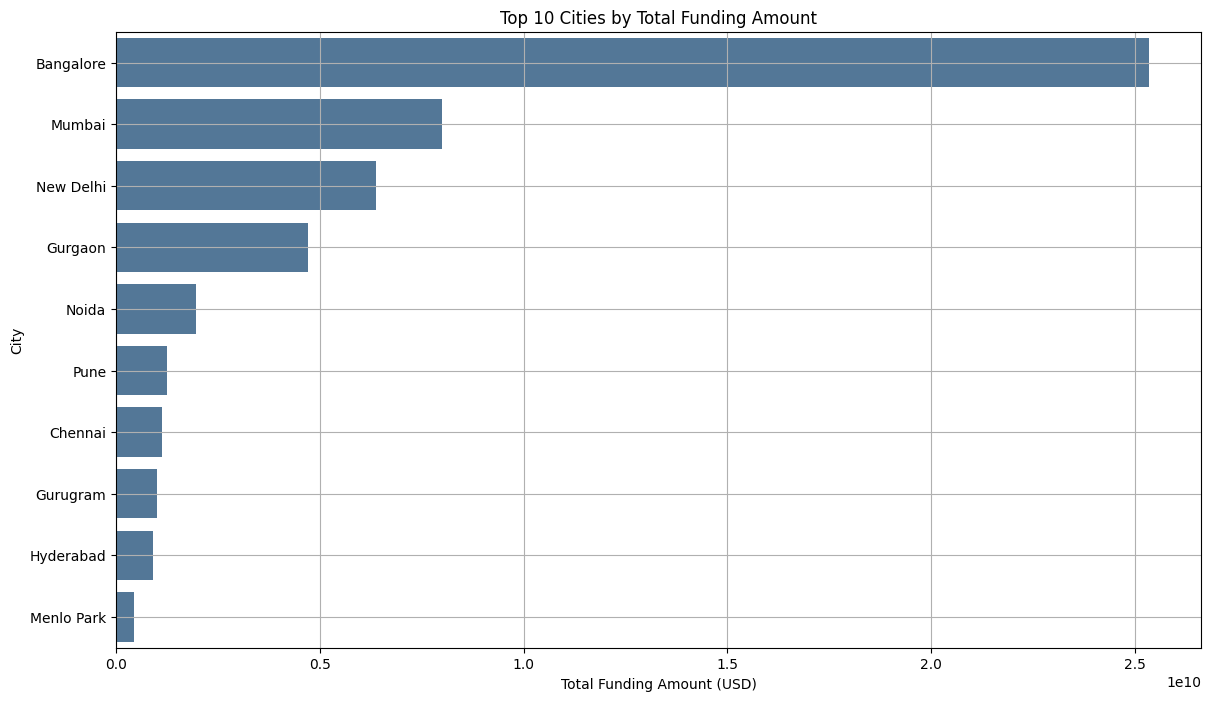

In [ ]:
# Calculate the total funding amount received by startups in each city
top_cities_funding = df.groupby('City  Location')['Amount in USD'].sum().reset_index()
top_cities_funding = top_cities_funding.sort_values(by='Amount in USD', ascending=False).head(10)
top_cities_funding.columns = ['City', 'Total Funding Amount']

# Plot the total funding amount by city
plt.figure(figsize=(14, 8))
sns.barplot(x='Total Funding Amount', y='City', data=top_cities_funding, color='#4878A2')
plt.title('Top 10 Cities by Total Funding Amount')
plt.xlabel('Total Funding Amount (USD)')
plt.ylabel('City')
plt.grid(True)
plt.show()

In [ ]:
# Sample data: Coordinates for the cities
import folium
from folium.plugins import MarkerCluster

# Coordinates for the cities
city_coords = {
    'City': ['Bangalore', 'Mumbai', 'New Delhi', 'Gurgaon', 'Noida', 'Pune', 'Chennai', 'Gurugram', 'Hyderabad', 'Menlo Park'],
    'Latitude': [12.9716, 19.0760, 28.6139, 28.4595, 28.5355, 18.5204, 13.0827, 28.4595, 17.3850, 37.452959],
    'Longitude': [77.5946, 72.8777, 77.2090, 77.0266, 77.3910, 73.8567, 80.2707, 77.0266, 78.4867, -122.181725]
}

# Convert to DataFrame
city_coords_df = pd.DataFrame(city_coords)

# Calculate the total funding amount
city_funding = df.groupby('City  Location')['Amount in USD'].sum().reset_index()
city_funding.columns = ['City', 'Total Funding Amount']

# Merge with coordinates
city_funding = city_funding.merge(city_coords_df, on='City', how='left')

# Filter out NaN values
city_funding = city_funding.dropna(subset=['Latitude', 'Longitude'])

# Select all cities in the first graph
selected_cities_funding = city_funding[city_funding['City'].isin(city_coords['City'])]

# Create a Folium map with the "dark" map style
m_funding = folium.Map(location=[20.5937, 78.9629], zoom_start=5, tiles='CartoDB dark_matter')  # Centered on India

# Add markers to the map for each city with the total funding amount
marker_cluster_funding = MarkerCluster().add_to(m_funding)

for idx, row in selected_cities_funding.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['City']}: ${row['Total Funding Amount']:,.2f}",
        icon=folium.Icon(color='green')
    ).add_to(marker_cluster_funding)

# Display the map
m_funding

#Who plays the main role in Indian Startups Ecosystem?

<ipython-input-457-8c0c1e78837d>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



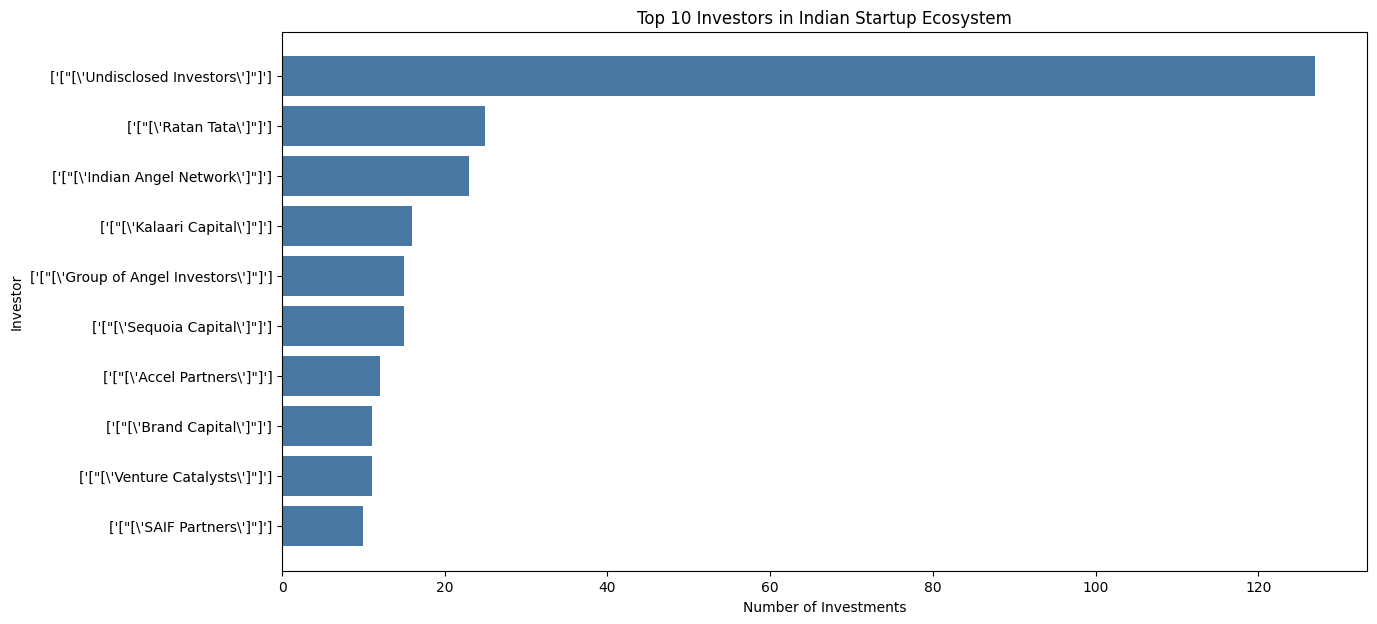

In [ ]:
# Investor analysis
investor_funding = df['Investors Name'].value_counts().reset_index()
investor_funding.columns = ['Investor', 'Number of Investments']

# Top 10 most invested investors
top_investors = investor_funding.head(10)

# Convert 'Investor' column to string type if it's not already
top_investors['Investor'] = top_investors['Investor'].astype(str)

plt.figure(figsize=(14, 7))
plt.barh(top_investors['Investor'],
         top_investors['Number of Investments'],
          color='#4878A2')
plt.xlabel('Number of Investments')
plt.ylabel('Investor')
plt.title('Top 10 Investors in Indian Startup Ecosystem')
plt.gca().invert_yaxis()
plt.show()

#What are the different Types of Funding for Startups?

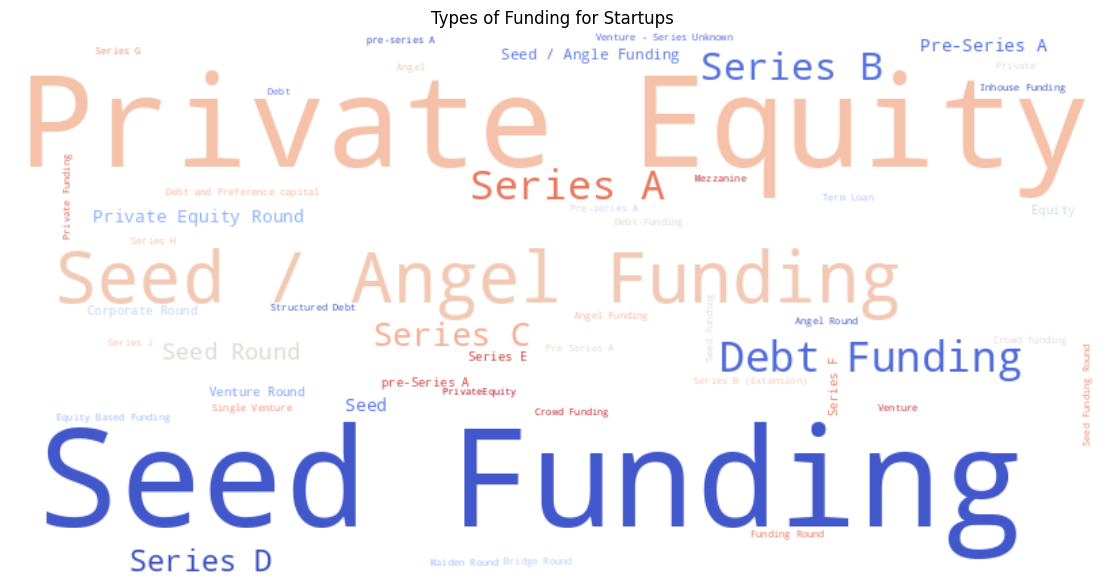

In [ ]:
from wordcloud import WordCloud

# Assuming df is the cleaned dataframe with startup data
# Count the number of each investment type
investment_types = df['InvestmentnType'].value_counts().reset_index()
investment_types.columns = ['Investment Type', 'Number of Investments']

# Convert the investment types to a dictionary
investment_dict = dict(zip(investment_types['Investment Type'], investment_types['Number of Investments']))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='coolwarm').generate_from_frequencies(investment_dict)

# Plot the word cloud
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Types of Funding for Startups')
plt.show()


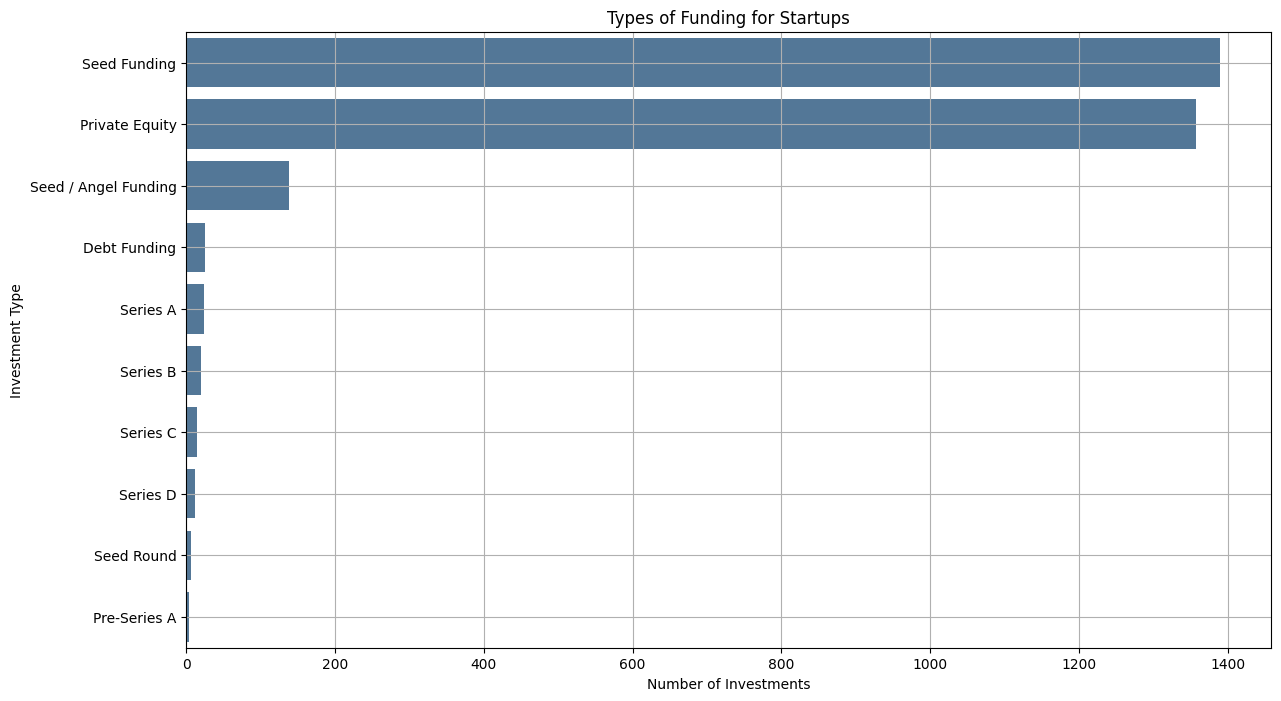

In [ ]:
# Assuming df is the cleaned dataframe with startup data
# Count the number of each investment type
investment_types = df['InvestmentnType'].value_counts().head(10).reset_index()
investment_types.columns = ['Investment Type', 'Number of Investments']

# Plot the investment types
plt.figure(figsize=(14, 8))
sns.barplot(x='Number of Investments', y='Investment Type', data=investment_types, color='#4878A2')
plt.title('Types of Funding for Startups')
plt.xlabel('Number of Investments')
plt.ylabel('Investment Type')
plt.grid(True)
plt.show()


In [ ]:
from IPython.display import HTML

def print_big_text(text):
  styled_text = f'<div style="font-size: 11em; text-align: center; color: yellow;">{text}</div>'
  return HTML(styled_text)

print_big_text("Thank You")